In [1]:
import os
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt  
import matplotlib.style
plt.style.use('classic')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')

In [3]:
df.head()

Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0    Male  39.0        4.0            0.0         0.0      0.0   
1  Female  46.0        2.0            0.0         0.0      0.0   
2    Male  48.0        1.0            1.0        20.0      0.0   
3  Female  61.0        3.0            1.0        30.0      0.0   
4  Female  46.0        3.0            1.0        23.0      0.0   

   prevalentStroke  prevalentHyp  diabetes  tot cholesterol  Systolic BP  \
0              0.0           0.0       0.0            195.0        106.0   
1              0.0           0.0       0.0            250.0        121.0   
2              0.0           0.0       0.0            245.0        127.5   
3              0.0           1.0       0.0            225.0        150.0   
4              0.0           0.0       0.0            285.0        130.0   

   Diastolic BP    BMI  heartRate  glucose  Heart-Att  
0          70.0  26.97       80.0     77.0          0  
1          81.0  28.73       95.0     76.0          0  
2          80.0  25.34       75.0     70.0          0  
3          95.0  28.58       65.0    103.0          1  
4          84.0  23.10       85.0     85.0          0

### A normal blood pressure reading is less than 120 mm Hg systolic and less than 80 mm Hg diastolic. 


### The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [5]:
print("No.of Rows :",df.shape[0],"\n""No.of Columns: ",df.shape[1])

No.of Rows : 4240 
No.of Columns:  16


In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"The {column.upper()} has : {df[column].nunique()} unique values")
        print(df[column].value_counts())
        print()

The GENDER has : 2 unique values
Gender
Female    2414
Male      1818
Name: count, dtype: int64



In [7]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(f"The {column.upper()} has : {df[column].nunique()} unique values")
        print(df[column].value_counts())
        print()

The AGE has : 39 unique values
age
40.0    192
46.0    182
42.0    180
41.0    174
48.0    173
39.0    170
44.0    166
45.0    162
43.0    158
52.0    149
51.0    146
55.0    145
38.0    144
47.0    141
50.0    140
53.0    139
54.0    132
49.0    132
57.0    123
56.0    123
59.0    119
58.0    117
60.0    110
63.0    110
61.0    110
62.0     99
64.0     93
37.0     92
36.0     84
65.0     57
67.0     45
35.0     42
66.0     38
34.0     18
68.0     18
69.0      7
33.0      5
70.0      2
32.0      1
Name: count, dtype: int64

The EDUCATION has : 4 unique values
education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64

The CURRENTSMOKER has : 2 unique values
currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64

The CIGSPERDAY has : 33 unique values
cigsPerDay
0.0     2145
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      120
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18


In [8]:
round(df.isnull().sum()*100/df.shape[0],2).sort_values()

Heart-Att          0.00
age                0.05
prevalentHyp       0.05
diabetes           0.05
currentSmoker      0.07
Systolic BP        0.09
heartRate          0.09
Diastolic BP       0.12
Gender             0.19
prevalentStroke    0.21
BMI                0.57
cigsPerDay         0.73
BP Meds            1.42
tot cholesterol    1.42
education          2.59
glucose            9.22
dtype: float64

In [9]:
df.duplicated().sum()

0

In [10]:
df.Gender.mode()[0]

'Female'

In [11]:
df.Gender = df.Gender.fillna(df.Gender.mode()[0])

In [12]:
df.isnull().sum()

Gender               0
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [13]:
df.rename(columns={"BP Meds":"BPMeds","tot cholesterol":"tot_cholesterol","Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP"},inplace=True)

In [14]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot_cholesterol',
       'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [126]:
df_mean = df.copy()
df_median = df.copy()

In [127]:
df_mean['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)

In [128]:
df_median['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)

In [129]:
df_mean.head()

Gender   age  education  currentSmoker  cigsPerDay  BPMeds  \
0       1  39.0        4.0            0.0         0.0     0.0   
1       0  46.0        2.0            0.0         0.0     0.0   
2       1  48.0        1.0            1.0        20.0     0.0   
3       0  61.0        3.0            1.0        30.0     0.0   
4       0  46.0        3.0            1.0        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  tot_cholesterol  Systolic_BP  \
0              0.0           0.0       0.0            195.0        106.0   
1              0.0           0.0       0.0            250.0        121.0   
2              0.0           0.0       0.0            245.0        127.5   
3              0.0           1.0       0.0            225.0        150.0   
4              0.0           0.0       0.0            285.0        130.0   

   Diastolic_BP    BMI  heartRate  glucose  Heart-Att  
0          70.0  26.97       80.0     77.0          0  
1          81.0  28.73       95.0     76.0          0  
2          80.0  25.34       75.0     70.0          0  
3          95.0  28.58       65.0    103.0          1  
4          84.0  23.10       85.0     85.0          0

In [130]:
for column in ['Gender','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']:
    df_mean[column].fillna(df_mean[column].mode()[0],inplace=True)
    df_median[column].fillna(df_median[column].mode()[0],inplace=True)

In [131]:
df_mean.isnull().sum()

Gender               0
age                  2
education            0
currentSmoker        0
cigsPerDay          31
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
tot_cholesterol     60
Systolic_BP          4
Diastolic_BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [132]:
df_median.isnull().sum()

Gender               0
age                  2
education            0
currentSmoker        0
cigsPerDay          31
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
tot_cholesterol     60
Systolic_BP          4
Diastolic_BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [133]:
for column in ['age','cigsPerDay','tot_cholesterol','Systolic_BP','Diastolic_BP','BMI','heartRate','glucose']:
    mean = df_mean[column].mean()
    df_mean[column] = df_mean[column].fillna(mean)
    median = df_median[column].median()
    df_median[column] = df_median[column].fillna(median)

In [134]:
df_mean.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot_cholesterol    0
Systolic_BP        0
Diastolic_BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [135]:
df_median.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot_cholesterol    0
Systolic_BP        0
Diastolic_BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [136]:
df_knn = df.copy()

In [137]:
df_knn['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)

## Outlier Treatment for KNN

In [138]:
df_knn_O = df_knn.copy()

In [139]:
df_knn.head()

Gender   age  education  currentSmoker  cigsPerDay  BPMeds  \
0       1  39.0        4.0            0.0         0.0     0.0   
1       0  46.0        2.0            0.0         0.0     0.0   
2       1  48.0        1.0            1.0        20.0     0.0   
3       0  61.0        3.0            1.0        30.0     0.0   
4       0  46.0        3.0            1.0        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  tot_cholesterol  Systolic_BP  \
0              0.0           0.0       0.0            195.0        106.0   
1              0.0           0.0       0.0            250.0        121.0   
2              0.0           0.0       0.0            245.0        127.5   
3              0.0           1.0       0.0            225.0        150.0   
4              0.0           0.0       0.0            285.0        130.0   

   Diastolic_BP    BMI  heartRate  glucose  Heart-Att  
0          70.0  26.97       80.0     77.0          0  
1          81.0  28.73       95.0     76.0          0  
2          80.0  25.34       75.0     70.0          0  
3          95.0  28.58       65.0    103.0          1  
4          84.0  23.10       85.0     85.0          0

In [140]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot_cholesterol  4180 non-null   float64
 10  Systolic_BP      4236 non-null   float64
 11  Diastolic_BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 530.1 KB


In [141]:
for column in ['Gender','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']:
    df_knn[column].fillna(df_knn[column].mode()[0],inplace=True)
    df_knn_O[column].fillna(df_knn_O[column].mode()[0],inplace=True)

In [142]:
df_knn.isnull().sum()

Gender               0
age                  2
education            0
currentSmoker        0
cigsPerDay          31
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
tot_cholesterol     60
Systolic_BP          4
Diastolic_BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [143]:
df_knn_O.isnull().sum()

Gender               0
age                  2
education            0
currentSmoker        0
cigsPerDay          31
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
tot_cholesterol     60
Systolic_BP          4
Diastolic_BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [144]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed,columns=df_knn.columns)

In [145]:
df_knn.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot_cholesterol    0
Systolic_BP        0
Diastolic_BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [146]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_knn_O)
df_knn_O = pd.DataFrame(data = df_imputed,columns=df_knn_O.columns)

In [147]:
df_knn_O.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot_cholesterol    0
Systolic_BP        0
Diastolic_BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

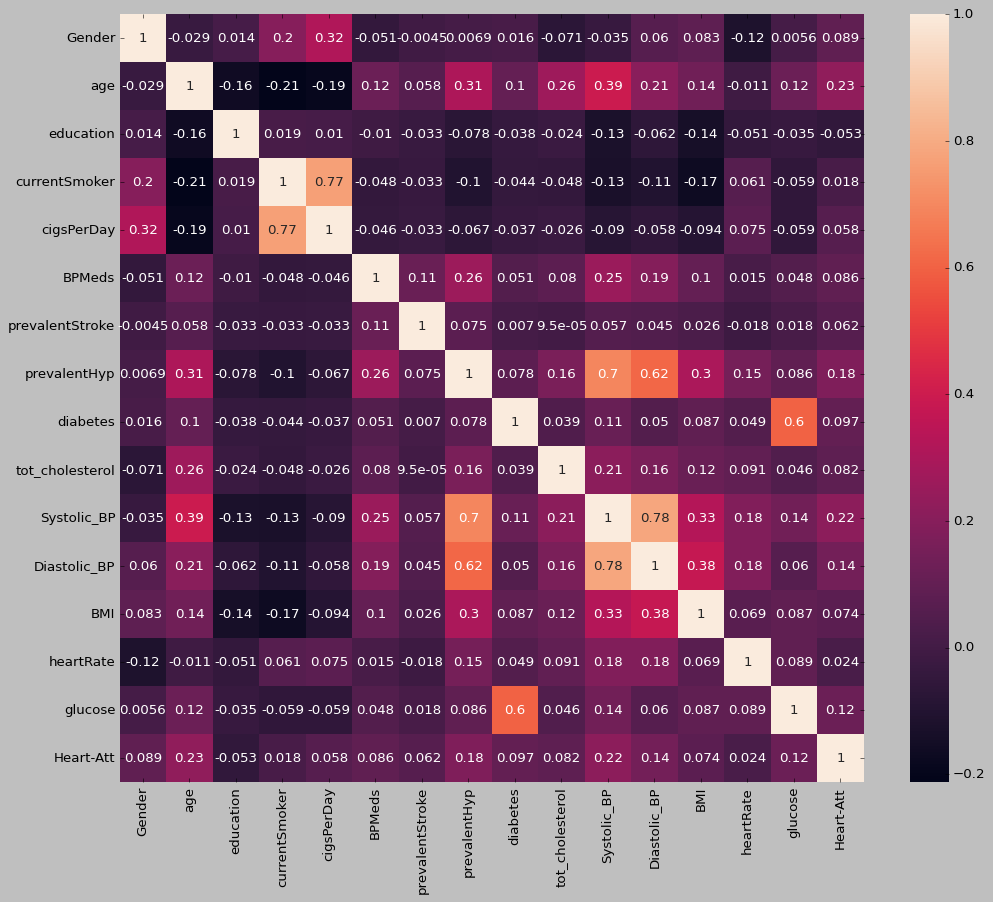

In [148]:
plt.figure(figsize=(15,12))
sns.heatmap(df_knn.corr(),annot=True)
plt.show()

In [149]:
df_knn.drop(['Diastolic_BP','prevalentHyp','currentSmoker'],axis=1,inplace=True)

In [150]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   diabetes         4240 non-null   float64
 7   tot_cholesterol  4240 non-null   float64
 8   Systolic_BP      4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  heartRate        4240 non-null   float64
 11  glucose          4240 non-null   float64
 12  Heart-Att        4240 non-null   float64
dtypes: float64(13)
memory usage: 430.8 KB


## Standard Scaler

In [151]:
df_knn1= df_knn[['age','cigsPerDay','tot_cholesterol','Systolic_BP','BMI','heartRate',
                 'glucose','Heart-Att']].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [152]:
df_knn1['Gender'] = df_knn['Gender']
df_knn1['BPMeds'] = df_knn['BPMeds']
df_knn1['diabetes'] = df_knn['diabetes']
df_knn1['education'] = df_knn['education']
df_knn1['prevalentStroke'] = df_knn['prevalentStroke']

In [153]:
df_knn1.head()

age  cigsPerDay  tot_cholesterol  Systolic_BP       BMI  heartRate  \
0  0.184211    0.000000         0.149406     0.106383  0.277024   0.363636   
1  0.368421    0.000000         0.242784     0.177305  0.319680   0.515152   
2  0.421053    0.285714         0.234295     0.208038  0.237518   0.313131   
3  0.763158    0.428571         0.200340     0.314421  0.316045   0.212121   
4  0.368421    0.328571         0.302207     0.219858  0.183228   0.414141   

    glucose  Heart-Att  Gender  BPMeds  diabetes  education  prevalentStroke  
0  0.104520        0.0     1.0     0.0       0.0        4.0              0.0  
1  0.101695        0.0     0.0     0.0       0.0        2.0              0.0  
2  0.084746        0.0     1.0     0.0       0.0        1.0              0.0  
3  0.177966        1.0     0.0     0.0       0.0        3.0              0.0  
4  0.127119        0.0     0.0     0.0       0.0        3.0              0.0

In [154]:
df.head()

Gender   age  education  currentSmoker  cigsPerDay  BPMeds  \
0    Male  39.0        4.0            0.0         0.0     0.0   
1  Female  46.0        2.0            0.0         0.0     0.0   
2    Male  48.0        1.0            1.0        20.0     0.0   
3  Female  61.0        3.0            1.0        30.0     0.0   
4  Female  46.0        3.0            1.0        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  tot_cholesterol  Systolic_BP  \
0              0.0           0.0       0.0            195.0        106.0   
1              0.0           0.0       0.0            250.0        121.0   
2              0.0           0.0       0.0            245.0        127.5   
3              0.0           1.0       0.0            225.0        150.0   
4              0.0           0.0       0.0            285.0        130.0   

   Diastolic_BP    BMI  heartRate  glucose  Heart-Att  
0          70.0  26.97       80.0     77.0          0  
1          81.0  28.73       95.0     76.0          0  
2          80.0  25.34       75.0     70.0          0  
3          95.0  28.58       65.0    103.0          1  
4          84.0  23.10       85.0     85.0          0

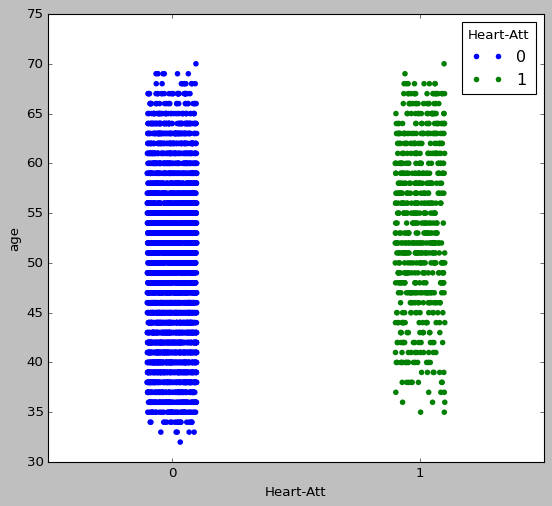

In [155]:
plt.figure(figsize=(8,7))
sns.stripplot(x='Heart-Att',y='age',hue='Heart-Att',data=df,jitter=True)
plt.show()

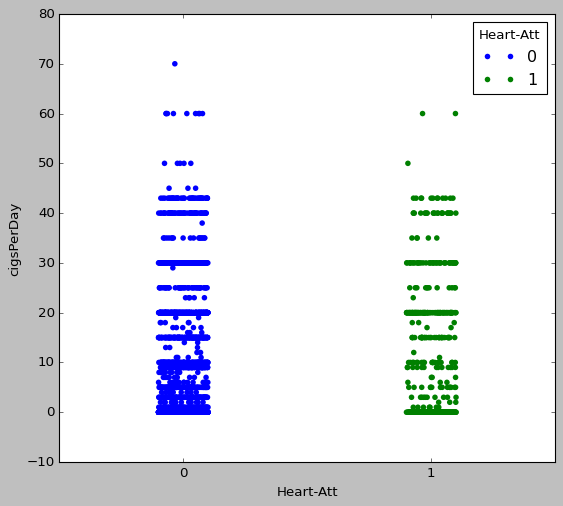

In [156]:
plt.figure(figsize=(8,7))
sns.stripplot(x='Heart-Att',y='cigsPerDay',hue='Heart-Att',data=df,jitter=True)
plt.show()

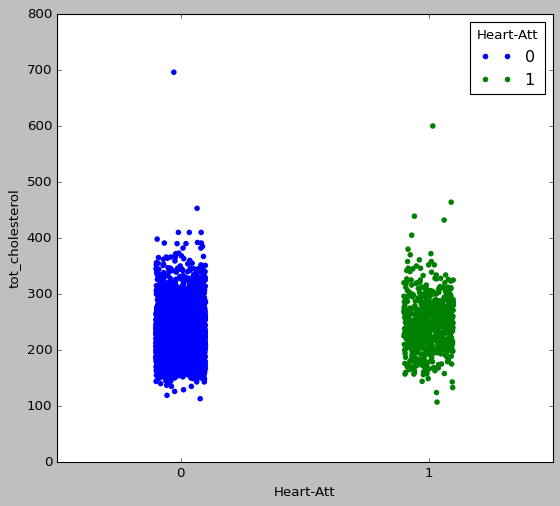

In [157]:
plt.figure(figsize=(8,7))
sns.stripplot(x='Heart-Att',y='tot_cholesterol',hue='Heart-Att',data=df,jitter=True)
plt.show()

### A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal. A total cholesterol level of 200 to 239 mg/dL (5.17 to 6.18 mmol/L) is borderline high. A total cholesterol level of 240 mg/dL (6.21 mmol/L) or greater is high.Your HDL (“good” cholesterol) is the one number you want to be high (ideally above 60). Your LDL (“bad” cholesterol) should be below 100. Your total should be below 200. 

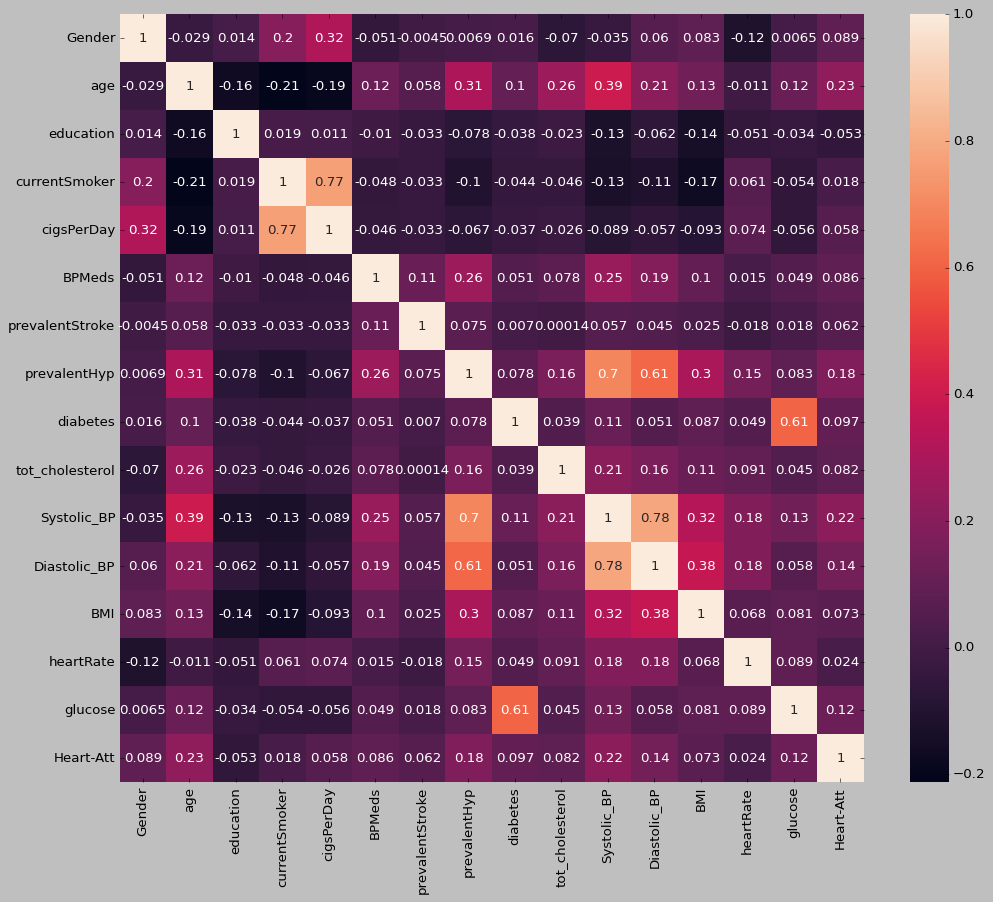

In [158]:
plt.figure(figsize=(15,12))
sns.heatmap(df_mean.corr(),annot=True)
plt.show()

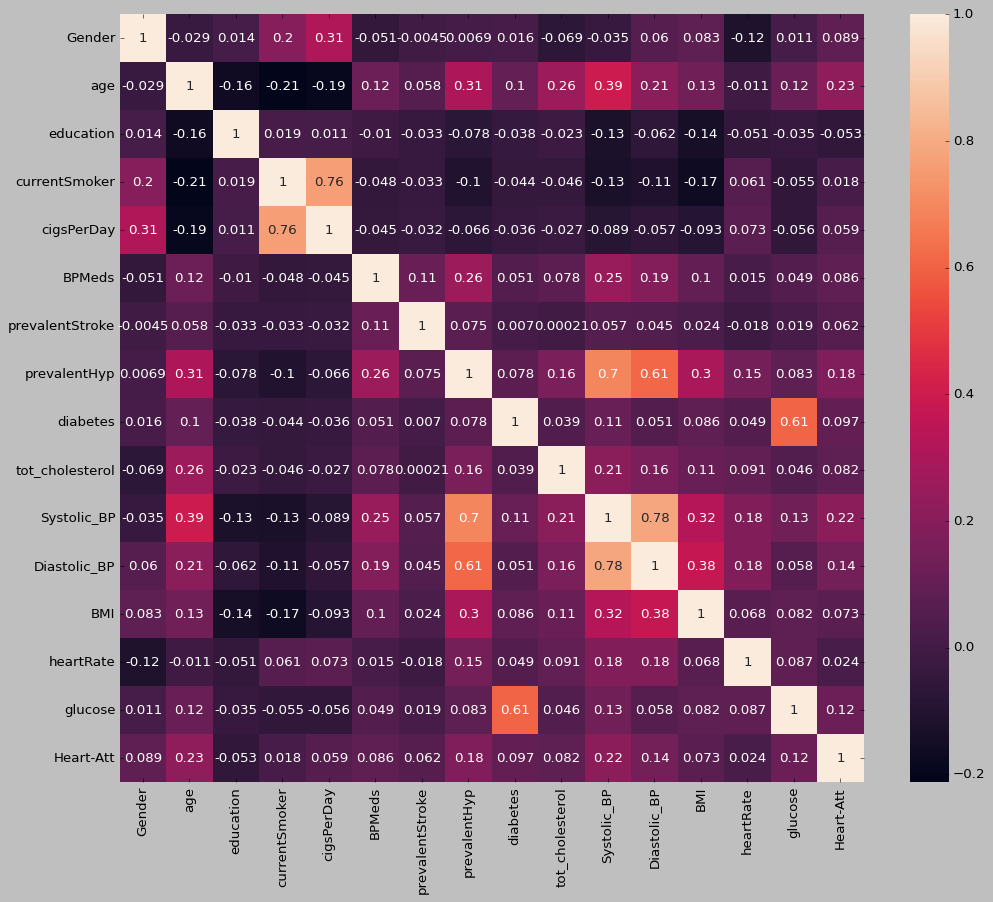

In [159]:
plt.figure(figsize=(15,12))
sns.heatmap(df_median.corr(),annot=True)
plt.show()

In [160]:
df_mean.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot_cholesterol',
       'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [161]:
df_mean.drop(['currentSmoker','Diastolic_BP'],axis=1,inplace=True)

## Outlier Treatment for Mean  

In [169]:
df_mean_O = df_mean.copy()

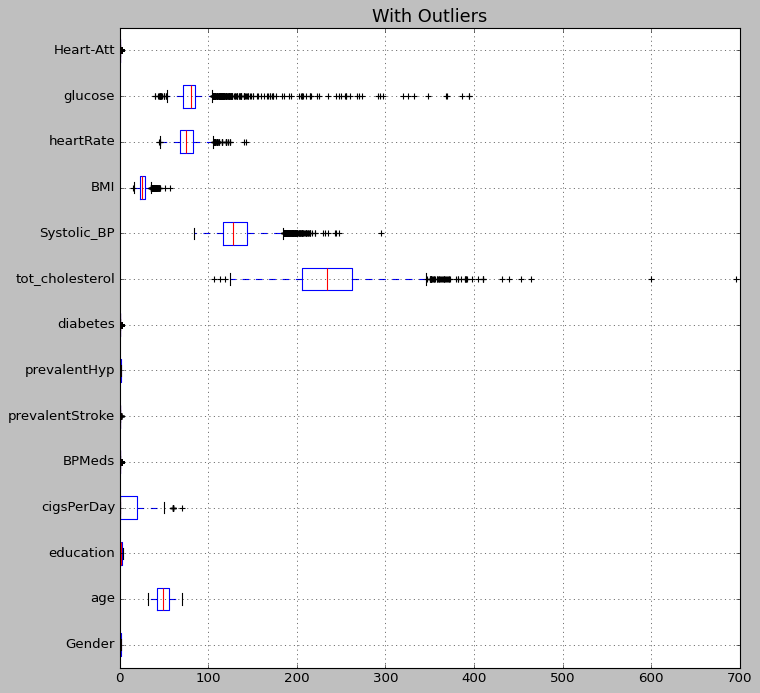

In [170]:
cont=df_mean.dtypes[(df_mean.dtypes!='uint8') & (df_mean.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [172]:
def outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

def remove_outlier(data):
    for column in data.drop(['glucose','Heart-Att'],axis=1).columns:
        lr,ur=outlier(data[column])
        data[column]=np.where(data[column]>ur,ur,data[column])
        data[column]=np.where(data[column]<lr,lr,data[column])

In [173]:
remove_outlier(df_mean_O)

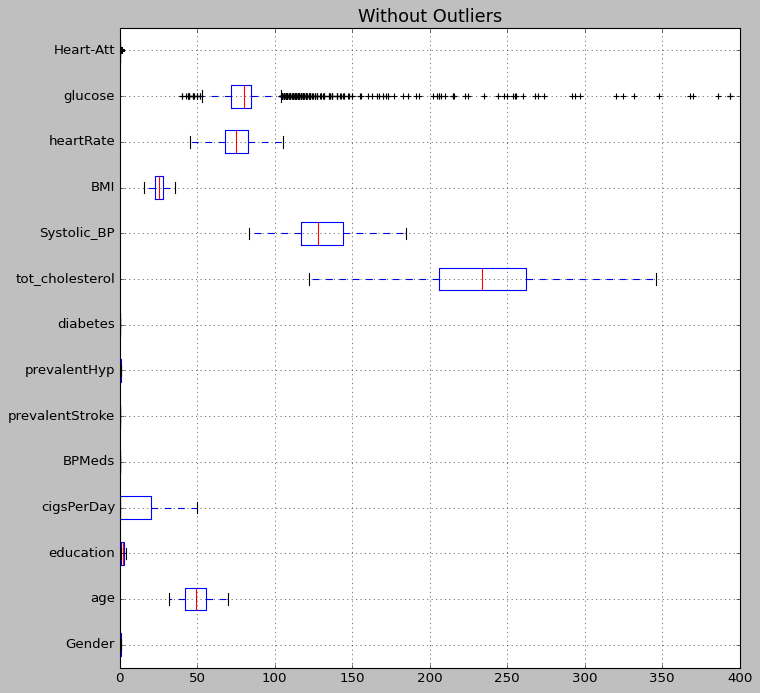

In [174]:
cont=df_mean_O.dtypes[(df_mean_O.dtypes!='uint8') & (df_mean_O.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean_O[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

## Scaling
### Min-Max Scaling

In [175]:
df_mean_O.head()

Gender   age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0     1.0  39.0        4.0         0.0     0.0              0.0           0.0   
1     0.0  46.0        2.0         0.0     0.0              0.0           0.0   
2     1.0  48.0        1.0        20.0     0.0              0.0           0.0   
3     0.0  61.0        3.0        30.0     0.0              0.0           1.0   
4     0.0  46.0        3.0        23.0     0.0              0.0           0.0   

   diabetes  tot_cholesterol  Systolic_BP    BMI  heartRate  glucose  \
0       0.0            195.0        106.0  26.97       80.0     77.0   
1       0.0            250.0        121.0  28.73       95.0     76.0   
2       0.0            245.0        127.5  25.34       75.0     70.0   
3       0.0            225.0        150.0  28.58       65.0    103.0   
4       0.0            285.0        130.0  23.10       85.0     85.0   

   Heart-Att  
0          0  
1          0  
2          0  
3          1  
4          0

In [177]:
df_mean_Out = df_mean_O.drop(['BPMeds','prevalentStroke','diabetes','Heart-Att'],axis=1).apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [178]:
df_mean_Out['Heart-Att'] = df_mean_O['Heart-Att']

In [180]:
df_mean_Out.head()

Gender       age  education  cigsPerDay  prevalentHyp  tot_cholesterol  \
0     1.0  0.184211   1.000000        0.00           0.0         0.325893   
1     0.0  0.368421   0.333333        0.00           0.0         0.571429   
2     1.0  0.421053   0.000000        0.40           0.0         0.549107   
3     0.0  0.763158   0.666667        0.60           1.0         0.459821   
4     0.0  0.368421   0.666667        0.46           0.0         0.727679   

   Systolic_BP       BMI  heartRate   glucose  Heart-Att  
0     0.222772  0.571862   0.575000  0.104520          0  
1     0.371287  0.660931   0.825000  0.101695          0  
2     0.435644  0.489372   0.491667  0.084746          0  
3     0.658416  0.653340   0.325000  0.177966          1  
4     0.460396  0.376012   0.658333  0.127119          0

In [181]:
df_mean = df_mean.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [182]:
df_mean.head()

Gender       age  education  cigsPerDay  BPMeds  prevalentStroke  \
0     1.0  0.184211   1.000000    0.000000     0.0              0.0   
1     0.0  0.368421   0.333333    0.000000     0.0              0.0   
2     1.0  0.421053   0.000000    0.285714     0.0              0.0   
3     0.0  0.763158   0.666667    0.428571     0.0              0.0   
4     0.0  0.368421   0.666667    0.328571     0.0              0.0   

   prevalentHyp  diabetes  tot_cholesterol  Systolic_BP       BMI  heartRate  \
0           0.0       0.0         0.149406     0.106383  0.277024   0.363636   
1           0.0       0.0         0.242784     0.177305  0.319680   0.515152   
2           0.0       0.0         0.234295     0.208038  0.237518   0.313131   
3           1.0       0.0         0.200340     0.314421  0.316045   0.212121   
4           0.0       0.0         0.302207     0.219858  0.183228   0.414141   

    glucose  Heart-Att  
0  0.104520        0.0  
1  0.101695        0.0  
2  0.084746        0.0  
3  0.177966        1.0  
4  0.127119        0.0

## Outlier for Median

In [196]:
df_median.drop(['currentSmoker','Diastolic_BP'],axis=1,inplace=True)

In [197]:
df_median_O = df_median.copy()

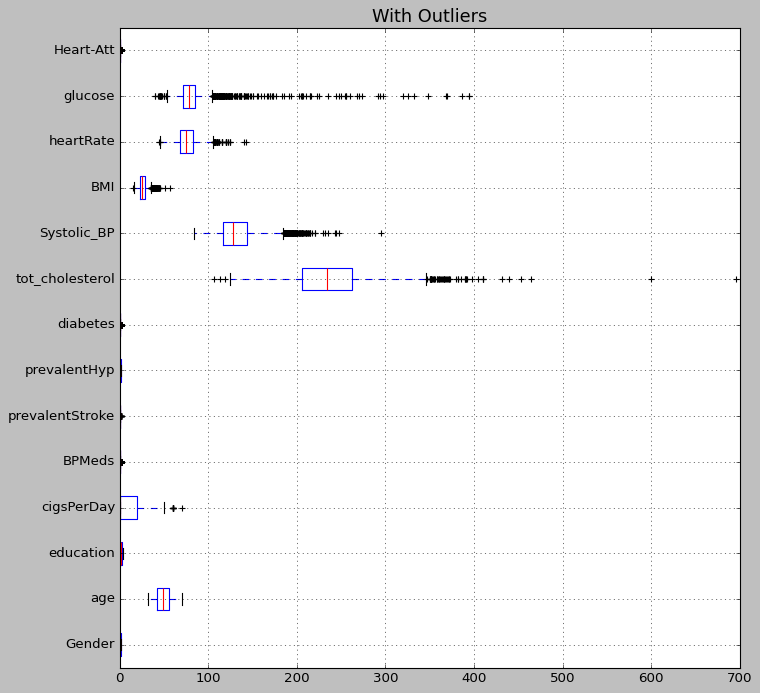

In [198]:
cont=df_median.dtypes[(df_median.dtypes!='uint8') & (df_median.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_median[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [199]:
remove_outlier(df_median_O)

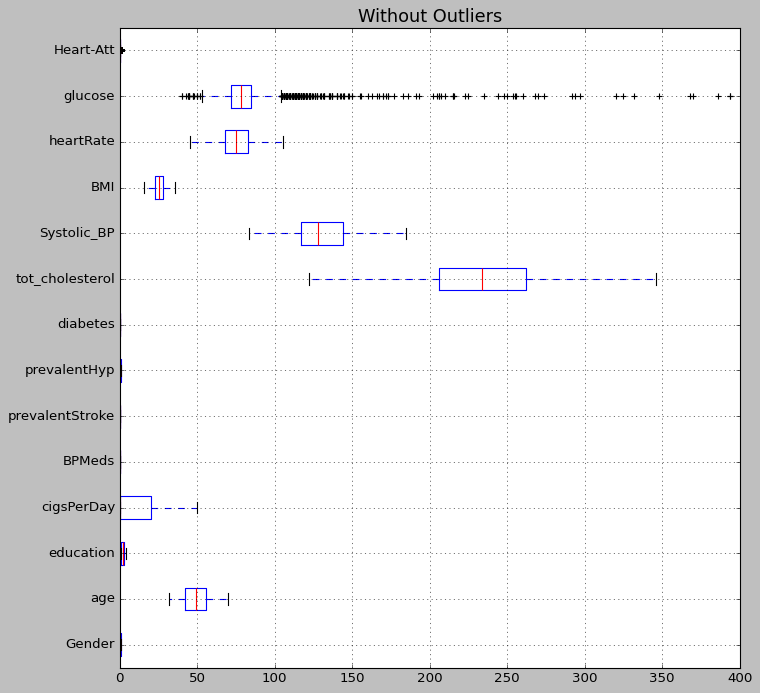

In [200]:
cont=df_median_O.dtypes[(df_median_O.dtypes!='uint8') & (df_median_O.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_median_O[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [201]:
df_median_Out = df_median_O.drop(['BPMeds','prevalentStroke','diabetes','Heart-Att'],axis=1).apply(lambda x:(x-x.min())/(x.max()-x.min()))
df_median_Out['Heart-Att'] = df_median_O['Heart-Att']
df_median_Out.head()

Gender       age  education  cigsPerDay  prevalentHyp  tot_cholesterol  \
0     1.0  0.184211   1.000000        0.00           0.0         0.325893   
1     0.0  0.368421   0.333333        0.00           0.0         0.571429   
2     1.0  0.421053   0.000000        0.40           0.0         0.549107   
3     0.0  0.763158   0.666667        0.60           1.0         0.459821   
4     0.0  0.368421   0.666667        0.46           0.0         0.727679   

   Systolic_BP       BMI  heartRate   glucose  Heart-Att  
0     0.222772  0.571862   0.575000  0.104520          0  
1     0.371287  0.660931   0.825000  0.101695          0  
2     0.435644  0.489372   0.491667  0.084746          0  
3     0.658416  0.653340   0.325000  0.177966          1  
4     0.460396  0.376012   0.658333  0.127119          0

In [202]:
df_median = df_median.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [203]:
df_median.head()

Gender       age  education  cigsPerDay  BPMeds  prevalentStroke  \
0     1.0  0.184211   1.000000    0.000000     0.0              0.0   
1     0.0  0.368421   0.333333    0.000000     0.0              0.0   
2     1.0  0.421053   0.000000    0.285714     0.0              0.0   
3     0.0  0.763158   0.666667    0.428571     0.0              0.0   
4     0.0  0.368421   0.666667    0.328571     0.0              0.0   

   prevalentHyp  diabetes  tot_cholesterol  Systolic_BP       BMI  heartRate  \
0           0.0       0.0         0.149406     0.106383  0.277024   0.363636   
1           0.0       0.0         0.242784     0.177305  0.319680   0.515152   
2           0.0       0.0         0.234295     0.208038  0.237518   0.313131   
3           1.0       0.0         0.200340     0.314421  0.316045   0.212121   
4           0.0       0.0         0.302207     0.219858  0.183228   0.414141   

    glucose  Heart-Att  
0  0.104520        0.0  
1  0.101695        0.0  
2  0.084746        0.0  
3  0.177966        1.0  
4  0.127119        0.0

## Model Building on Mean Data

## Confusion Matrix
### 0 - 0 = True Negative(TN) Actuals-0,Prediction-0
### 0 - 1 = False Positive(FP) Actuals-0,Prediction-1
### 1 - 0 = False Negative(FN) Actuals-1,Prediction-0
### 1 - 1 = True Positive(TP) Actuals-1,Prediction-1
## False Negative More Dangerous

## SMOTE

In [115]:
def SMOTE(data):
    X = data.drop('Heart-Att', axis=1)
    # Copy target into the y dataframe. 
    y = data[['Heart-Att']]
    
    # Train-Test Split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    # SMOTE
    from imblearn.over_sampling import SMOTE
    SM = SMOTE(random_state=2)
    X_train_s,y_train_s = SM.fit_resample(X_train,y_train)
    # Random Forest Model
    from sklearn.neighbors import KNeighborsClassifier 
    KNN_model_s = KNeighborsClassifier()
    KNN_model_s.fit(X_train_s, y_train_s)

    score = KNN_model_s.score(X_train_s, y_train_s)
    y_train_pred = KNN_model_s.predict(X_train_s)
    y_test_pred = KNN_model_s.predict(X_test)
    c_matrix_train = metrics.confusion_matrix(y_train_s,y_train_pred)
    c_matrix_test = metrics.confusion_matrix(y_test,y_test_pred)
    c_report_train = metrics.classification_report(y_train_s,y_train_pred,)
    c_report_test = metrics.classification_report(y_test,y_test_pred)

    return score,c_matrix_train,c_matrix_test,c_report_train,c_report_test

In [116]:
score,c_matrix_train,c_matrix_test,c_report_train,c_report_test = SMOTE(df_mean)
print(score)
print()
print(c_matrix_train)
print()
print(c_matrix_test)

0.8749502190362406

[[1926  585]
 [  43 2468]]

[[713 372]
 [100  87]]


              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86      2511
         1.0       0.81      0.98      0.89      2511

    accuracy                           0.87      5022
   macro avg       0.89      0.87      0.87      5022
weighted avg       0.89      0.87      0.87      5022



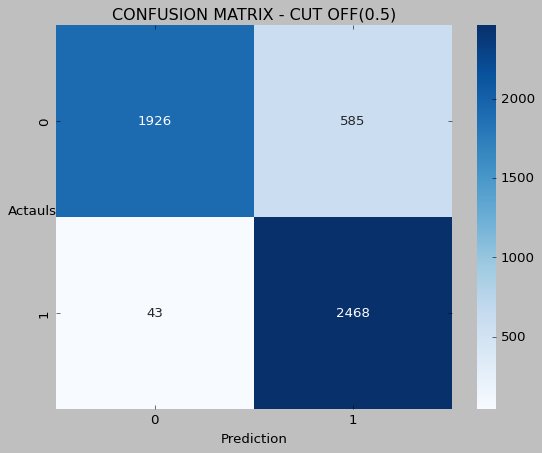

In [117]:
sns.heatmap((c_matrix_train),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actauls',rotation=0)
plt.title('CONFUSION MATRIX - CUT OFF(0.5)')
print(c_report_train)

In [118]:
TP = 2468
TN = 1926
FN = 43
FP = 585
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuarcy is: ",round(accuracy,2))
print()
precision = TP/(TP+FP)
print("Precision is: ",round(precision,2))
print()
recall = TP/(TP+FN)
print("Recall is: ",round(recall,2))
print()
f1_score = (2*precision*recall)/(precision+recall)
print("F1_Score is: ",round(f1_score,2))

Accuarcy is:  0.87

Precision is:  0.81

Recall is:  0.98

F1_Score is:  0.89


              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75      1085
         1.0       0.19      0.47      0.27       187

    accuracy                           0.63      1272
   macro avg       0.53      0.56      0.51      1272
weighted avg       0.78      0.63      0.68      1272



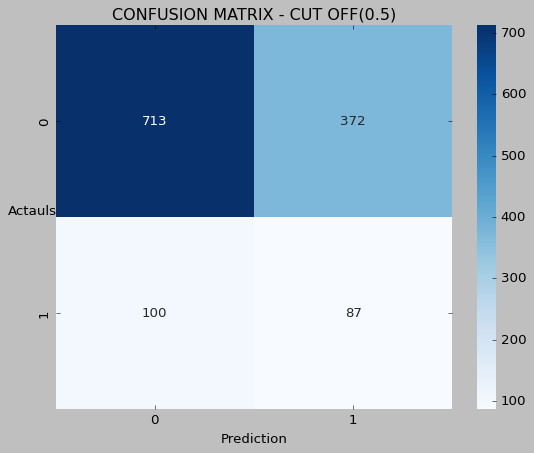

In [119]:
sns.heatmap((c_matrix_test),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actauls',rotation=0)
plt.title('CONFUSION MATRIX - CUT OFF(0.5)')
print(c_report_test)
plt.show()

In [120]:
TP = 87
TN = 713
FN = 100
FP = 372
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuarcy is: ",round(accuracy,2))
print()
precision = TP/(TP+FP)
print("Precision is: ",round(precision,2))
print()
recall = TP/(TP+FN)
print("Recall is: ",round(recall,2))
print()
f1_score = (2*precision*recall)/(precision+recall)
print("F1_Score is: ",round(f1_score,2))

Accuarcy is:  0.63

Precision is:  0.19

Recall is:  0.47

F1_Score is:  0.27


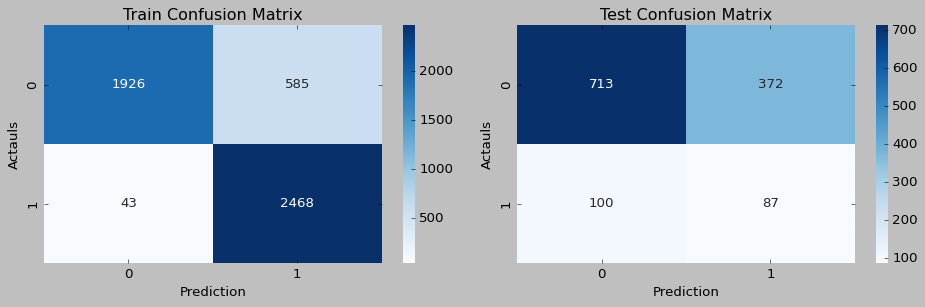

In [122]:
def plot_confusion_matrix(train_test,title, ax):
    sns.heatmap((train_test), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Actauls')
    ax.set_title(title)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_confusion_matrix(c_matrix_train,title='Train Confusion Matrix', ax=axs[0])

plot_confusion_matrix(c_matrix_test,title='Test Confusion Matrix', ax=axs[1])

plt.tight_layout()
plt.show()

In [218]:
from sklearn import tree 
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier 

def train_test(data):
    X = data.drop('Heart-Att', axis=1)
    # Copy target into the y dataframe. 
    y = data[['Heart-Att']]
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # SMOTE
    SM = SMOTE(random_state=2)
    X_train_s,y_train_s = SM.fit_resample(X_train,y_train)

    return X_train,X_test,y_train,y_test,X_train_s,y_train_s

def Models(data):

    # Naive Bayes Model
    NB_model = GaussianNB()

    # Decision Tree Model
    DT_model = tree.DecisionTreeClassifier()

    # Random Forest Model
    RF_model = RandomForestClassifier(n_estimators=100,random_state=1)
    
    # Ada Boost Model
    Ada_model = AdaBoostClassifier(n_estimators=100,random_state=1)

    # Gradient Boost Model
    GB_model = GradientBoostingClassifier(random_state=1)
    
    # KNeighbours Model
    KNN_model = KNeighborsClassifier()

    return NB_model,DT_model,RF_model,Ada_model,GB_model,KNN_model

def plot_confusion_matrix(train_test,title, ax):
            sns.heatmap((train_test), annot=True, fmt='d', cmap='Blues', ax=ax)
            ax.set_xlabel('Prediction')
            ax.set_ylabel('Actauls')
            ax.set_title(title)
            
model_s = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

def get_metrics_score(model,y_train,y_test,train_score,test_score,y_train_pred,y_test_pred):
        model_s.append(model)
        acc_train.append(np.round(train_score,2))
        acc_test.append(np.round(test_score,2))
        train_recall = metrics.recall_score(y_train,y_train_pred)
        train_precision = metrics.precision_score(y_train,y_train_pred)
        recall_train.append(np.round(train_recall,2))
        precision_train.append(np.round(train_precision,2))
        test_recall = metrics.recall_score(y_test,y_test_pred)
        test_precision = metrics.precision_score(y_test,y_test_pred)
        recall_test.append(np.round(test_recall,2))
        precision_test.append(np.round(test_precision,2))

        comparison_frame = pd.DataFrame({'Model':model_s,'Train_Accuracy':acc_train,'Test_Accuracy':acc_test,'Train_Recall':recall_train,
                                     'Test_Recall':recall_test,'Train_Precision':precision_train,'Test_Precision':precision_test})
        return comparison_frame
     
def operations(data):
    
    X_train,X_test,y_train,y_test,X_train_s,y_train_s = train_test(data)

    models = Models(data)
    #print(models)
    for model in models:
        print(model)
        n_model = model.fit(X_train, y_train)
        train_score = n_model.score(X_train, y_train)
        test_score = n_model.score(X_test, y_test)
        print("Model Train Score: ",train_score)
        print("Model Test Score: ",test_score)
        y_train_pred = n_model.predict(X_train)
        y_test_pred = n_model.predict(X_test)
        c_matrix_train = metrics.confusion_matrix(y_train,y_train_pred)
        c_matrix_test = metrics.confusion_matrix(y_test,y_test_pred)
        c_report_train = metrics.classification_report(y_train,y_train_pred)
        print("Classification_report for Train: ")
        print(c_report_train)
        c_report_test = metrics.classification_report(y_test,y_test_pred)
        print("Classification_report for Test: ")
        print(c_report_test)

        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        plot_confusion_matrix(c_matrix_train,title='Train Confusion Matrix', ax=axs[0])

        plot_confusion_matrix(c_matrix_test,title='Test Confusion Matrix', ax=axs[1])

        plt.tight_layout()
        plt.show()
     
        comparison_frame = get_metrics_score(model,y_train,y_test,train_score,test_score,y_train_pred,y_test_pred)

    return comparison_frame

def smote(data):
    X_train,X_test,y_train,y_test,X_train_s,y_train_s = train_test(data)

    models = Models(data)

    for model in models:
        print(model)
        s_model = model.fit(X_train_s, y_train_s)
        train_score = s_model.score(X_train_s, y_train_s)
        test_score = s_model.score(X_test, y_test)
        print("Model Train Score: ",train_score)
        print("Model Test Score: ",test_score)
        y_train_pred = s_model.predict(X_train_s)
        y_test_pred = s_model.predict(X_test)
        c_matrix_train = metrics.confusion_matrix(y_train_s,y_train_pred)
        c_matrix_test = metrics.confusion_matrix(y_test,y_test_pred)
        c_report_train = metrics.classification_report(y_train_s,y_train_pred)
        print("Classification_report for Train: ")
        print(c_report_train)
        c_report_test = metrics.classification_report(y_test,y_test_pred)
        print("Classification_report for Test: ")
        print(c_report_test)

        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        plot_confusion_matrix(c_matrix_train,title='Train Confusion Matrix', ax=axs[0])

        plot_confusion_matrix(c_matrix_test,title='Test Confusion Matrix', ax=axs[1])

        plt.tight_layout()
        plt.show()

        comparison_frame = get_metrics_score(model,y_train_s,y_test,train_score,test_score,y_train_pred,y_test_pred)

    return comparison_frame

GaussianNB()
Model Train Score:  0.8261455525606469
Model Test Score:  0.8301886792452831
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2511
         1.0       0.37      0.18      0.24       457

    accuracy                           0.83      2968
   macro avg       0.62      0.56      0.57      2968
weighted avg       0.79      0.83      0.80      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      1085
         1.0       0.35      0.19      0.24       187

    accuracy                           0.83      1272
   macro avg       0.61      0.56      0.57      1272
weighted avg       0.79      0.83      0.81      1272



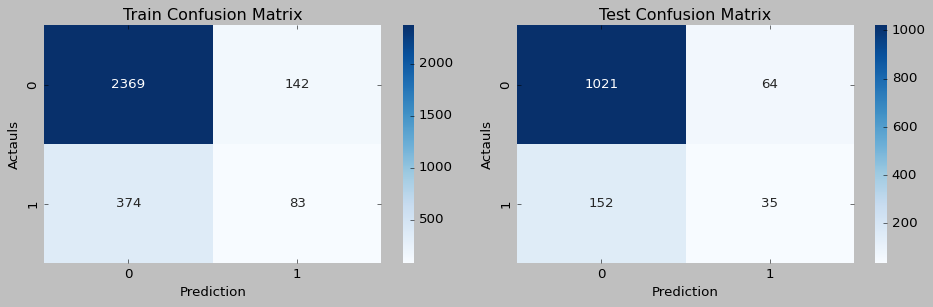

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7602201257861635
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1085
         1.0       0.21      0.23      0.22       187

    accuracy                           0.76      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.77      0.76      0.76      1272



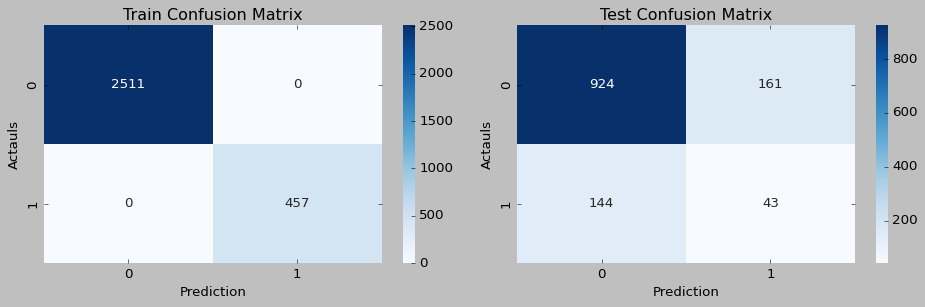

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.8498427672955975
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1085
         1.0       0.41      0.05      0.09       187

    accuracy                           0.85      1272
   macro avg       0.63      0.52      0.50      1272
weighted avg       0.79      0.85      0.80      1272



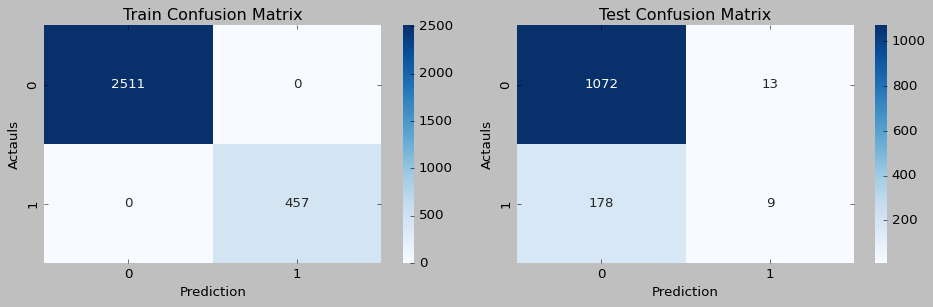

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.8601752021563343
Model Test Score:  0.8427672955974843
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      2511
         1.0       0.74      0.14      0.24       457

    accuracy                           0.86      2968
   macro avg       0.80      0.57      0.58      2968
weighted avg       0.84      0.86      0.82      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      1085
         1.0       0.34      0.07      0.12       187

    accuracy                           0.84      1272
   macro avg       0.60      0.52      0.52      1272
weighted avg       0.78      0.84      0.80      1272



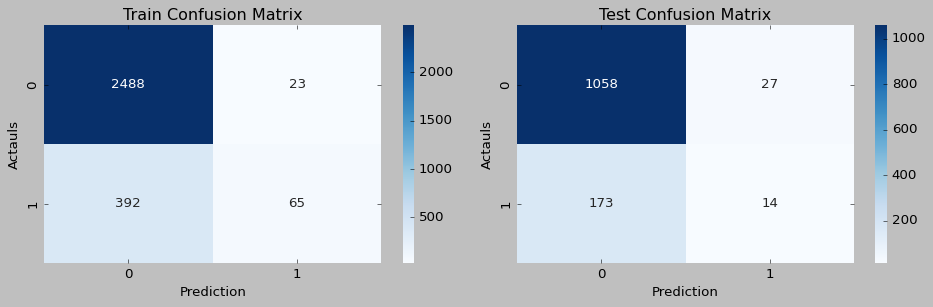

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8790431266846361
Model Test Score:  0.85062893081761
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      2511
         1.0       0.95      0.23      0.36       457

    accuracy                           0.88      2968
   macro avg       0.91      0.61      0.65      2968
weighted avg       0.89      0.88      0.85      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1085
         1.0       0.45      0.07      0.13       187

    accuracy                           0.85      1272
   macro avg       0.66      0.53      0.52      1272
weighted avg       0.80      0.85      0.80      1272



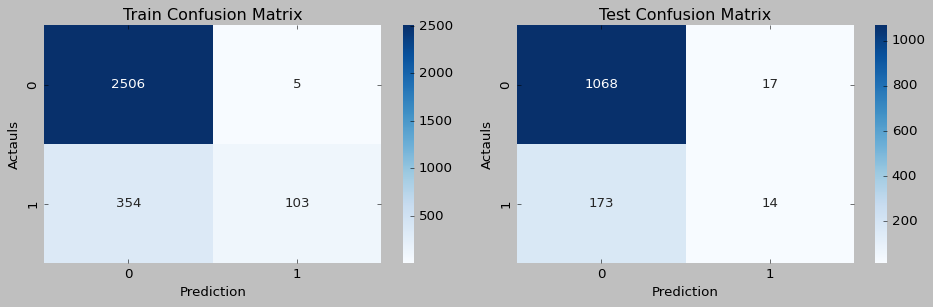

KNeighborsClassifier()
Model Train Score:  0.8706199460916442
Model Test Score:  0.8278301886792453
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2511
         1.0       0.76      0.24      0.36       457

    accuracy                           0.87      2968
   macro avg       0.82      0.61      0.64      2968
weighted avg       0.86      0.87      0.84      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91      1085
         1.0       0.17      0.04      0.07       187

    accuracy                           0.83      1272
   macro avg       0.51      0.50      0.49      1272
weighted avg       0.75      0.83      0.78      1272



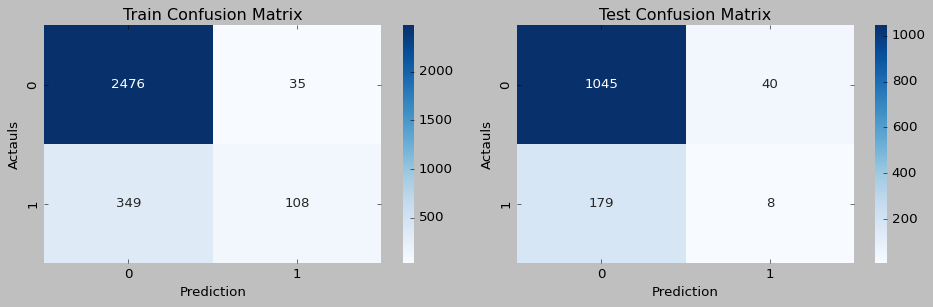

Model  Train_Accuracy  \
0                                       GaussianNB()            0.83   
1                           DecisionTreeClassifier()            1.00   
2  (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3  (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4  ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                             KNeighborsClassifier()            0.87   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.83          0.18         0.19             0.37            0.35  
1           0.76          1.00         0.23             1.00            0.21  
2           0.85          1.00         0.05             1.00            0.41  
3           0.84          0.14         0.07             0.74            0.34  
4           0.85          0.23         0.07             0.95            0.45  
5           0.83          0.24         0.04             0.76            0.17

In [185]:
operations(df_mean)

GaussianNB()
Model Train Score:  0.5981680605336519
Model Test Score:  0.8105345911949685
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.56      0.89      0.69      2511
         1.0       0.74      0.30      0.43      2511

    accuracy                           0.60      5022
   macro avg       0.65      0.60      0.56      5022
weighted avg       0.65      0.60      0.56      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1085
         1.0       0.35      0.33      0.34       187

    accuracy                           0.81      1272
   macro avg       0.62      0.61      0.61      1272
weighted avg       0.81      0.81      0.81      1272



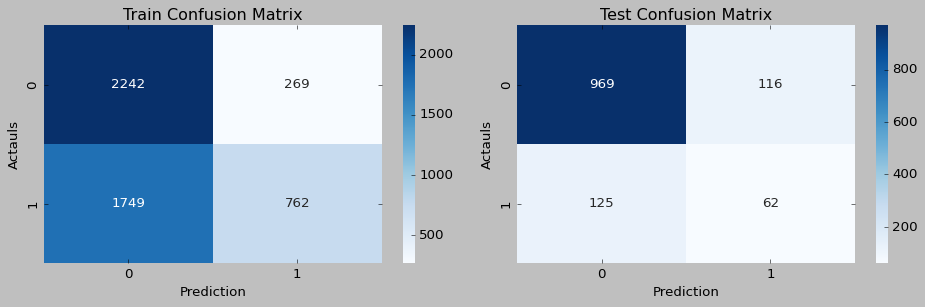

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7075471698113207
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      1085
         1.0       0.19      0.30      0.23       187

    accuracy                           0.71      1272
   macro avg       0.53      0.54      0.53      1272
weighted avg       0.77      0.71      0.73      1272



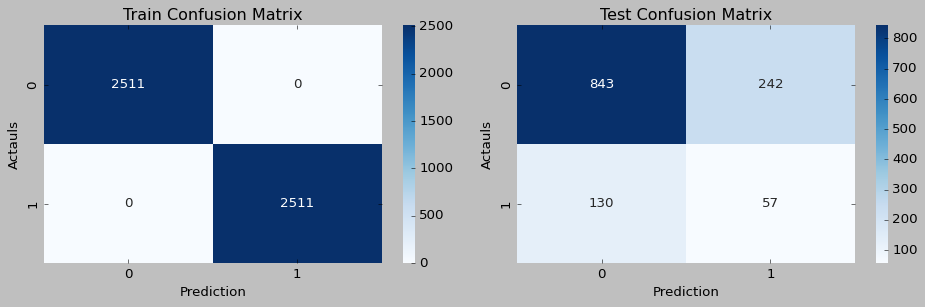

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.7885220125786163
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      1085
         1.0       0.23      0.18      0.20       187

    accuracy                           0.79      1272
   macro avg       0.55      0.54      0.54      1272
weighted avg       0.77      0.79      0.78      1272



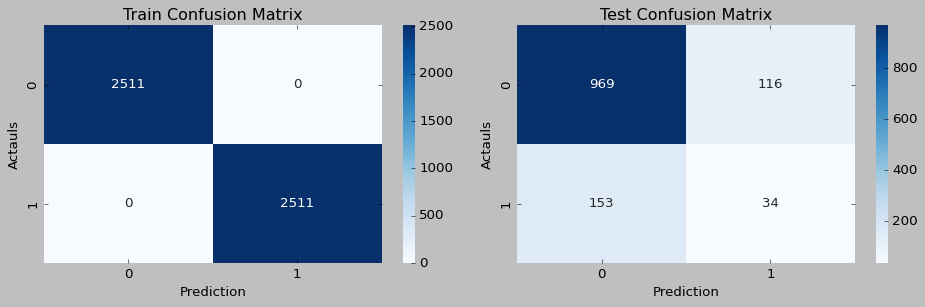

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.7741935483870968
Model Test Score:  0.7122641509433962
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77      2511
         1.0       0.77      0.78      0.78      2511

    accuracy                           0.77      5022
   macro avg       0.77      0.77      0.77      5022
weighted avg       0.77      0.77      0.77      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82      1085
         1.0       0.25      0.47      0.32       187

    accuracy                           0.71      1272
   macro avg       0.57      0.61      0.57      1272
weighted avg       0.80      0.71      0.74      1272



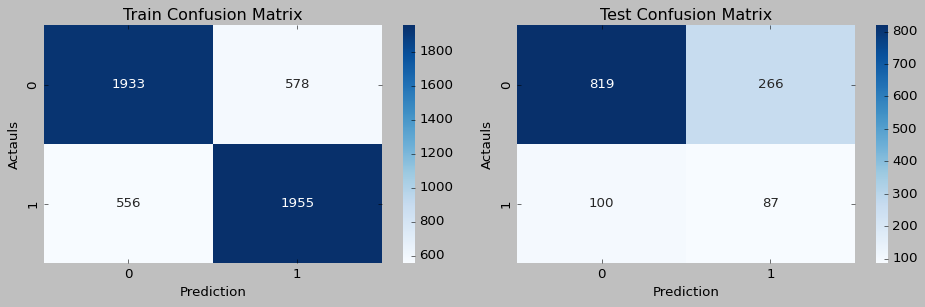

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.846873755475906
Model Test Score:  0.7437106918238994
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      2511
         1.0       0.85      0.85      0.85      2511

    accuracy                           0.85      5022
   macro avg       0.85      0.85      0.85      5022
weighted avg       0.85      0.85      0.85      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84      1085
         1.0       0.25      0.37      0.30       187

    accuracy                           0.74      1272
   macro avg       0.57      0.59      0.57      1272
weighted avg       0.79      0.74      0.76      1272



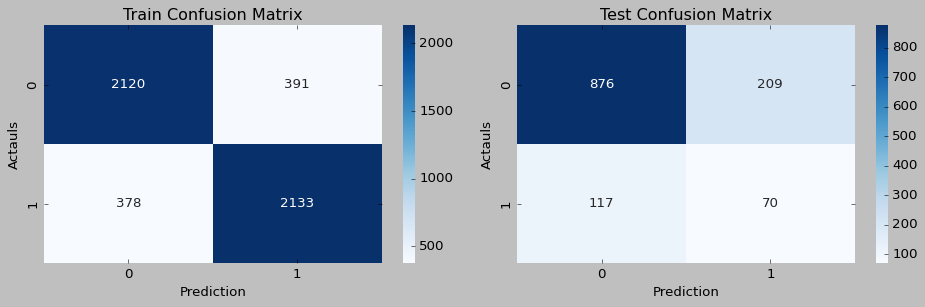

KNeighborsClassifier()
Model Train Score:  0.8749502190362406
Model Test Score:  0.6289308176100629
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86      2511
         1.0       0.81      0.98      0.89      2511

    accuracy                           0.87      5022
   macro avg       0.89      0.87      0.87      5022
weighted avg       0.89      0.87      0.87      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75      1085
         1.0       0.19      0.47      0.27       187

    accuracy                           0.63      1272
   macro avg       0.53      0.56      0.51      1272
weighted avg       0.78      0.63      0.68      1272



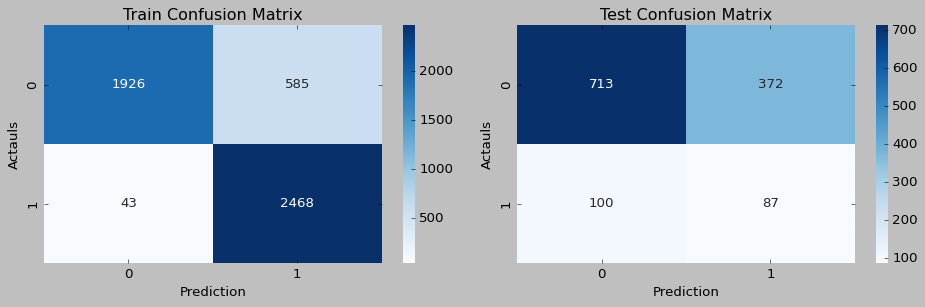

Model  Train_Accuracy  \
0                                        GaussianNB()            0.83   
1                            DecisionTreeClassifier()            1.00   
2   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3   (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4   ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                              KNeighborsClassifier()            0.87   
6                                        GaussianNB()            0.60   
7                            DecisionTreeClassifier()            1.00   
8   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
9   (DecisionTreeClassifier(max_depth=1, random_st...            0.77   
10  ([DecisionTreeRegressor(criterion='friedman_ms...            0.85   
11                             KNeighborsClassifier()            0.87   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0            0.83          0.18         0.19             0.37            0.35  
1            0.76          1.00         0.23             1.00            0.21  
2            0.85          1.00         0.05             1.00            0.41  
3            0.84          0.14         0.07             0.74            0.34  
4            0.85          0.23         0.07             0.95            0.45  
5            0.83          0.24         0.04             0.76            0.17  
6            0.81          0.30         0.33             0.74            0.35  
7            0.71          1.00         0.30             1.00            0.19  
8            0.79          1.00         0.18             1.00            0.23  
9            0.71          0.78         0.47             0.77            0.25  
10           0.74          0.85         0.37             0.85            0.25  
11           0.63          0.98         0.47             0.81            0.19

In [186]:
smote(df_mean)

GaussianNB()
Model Train Score:  0.8214285714285714
Model Test Score:  0.8294025157232704
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2511
           1       0.37      0.22      0.27       457

    accuracy                           0.82      2968
   macro avg       0.62      0.57      0.59      2968
weighted avg       0.79      0.82      0.80      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1085
           1       0.38      0.24      0.29       187

    accuracy                           0.83      1272
   macro avg       0.63      0.59      0.60      1272
weighted avg       0.80      0.83      0.81      1272



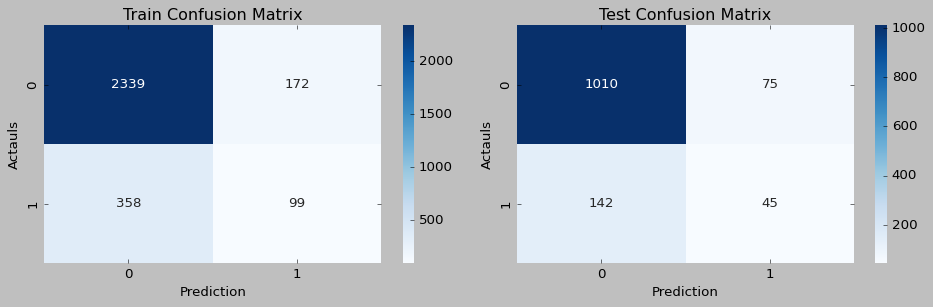

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7507861635220126
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1085
           1       0.19      0.22      0.21       187

    accuracy                           0.75      1272
   macro avg       0.53      0.53      0.53      1272
weighted avg       0.76      0.75      0.76      1272



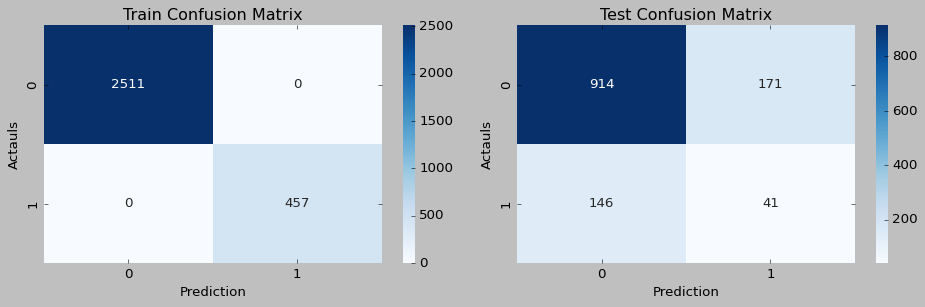

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.8529874213836478
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.50      0.07      0.12       187

    accuracy                           0.85      1272
   macro avg       0.68      0.53      0.52      1272
weighted avg       0.81      0.85      0.80      1272



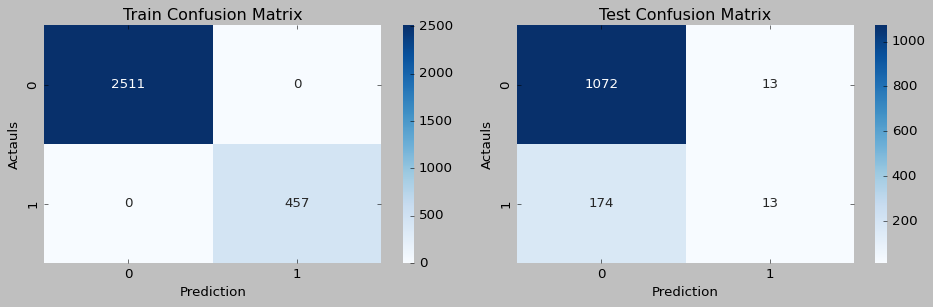

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.8588274932614556
Model Test Score:  0.8522012578616353
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2511
           1       0.72      0.14      0.23       457

    accuracy                           0.86      2968
   macro avg       0.79      0.56      0.58      2968
weighted avg       0.84      0.86      0.82      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.48      0.07      0.12       187

    accuracy                           0.85      1272
   macro avg       0.67      0.53      0.52      1272
weighted avg       0.80      0.85      0.80      1272



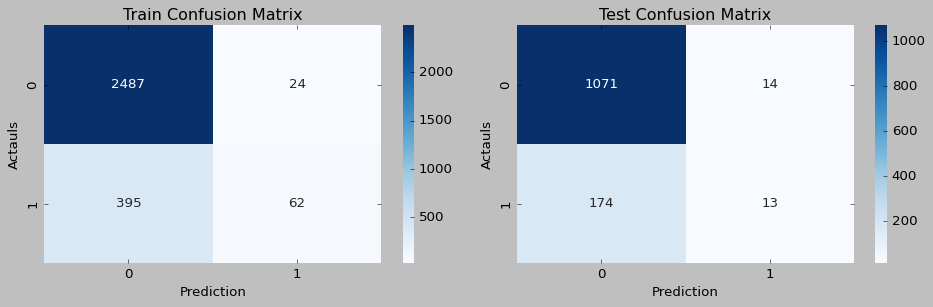

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8770215633423181
Model Test Score:  0.8490566037735849
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2511
           1       0.93      0.22      0.35       457

    accuracy                           0.88      2968
   macro avg       0.90      0.61      0.64      2968
weighted avg       0.88      0.88      0.84      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1085
           1       0.44      0.09      0.15       187

    accuracy                           0.85      1272
   macro avg       0.65      0.54      0.53      1272
weighted avg       0.80      0.85      0.80      1272



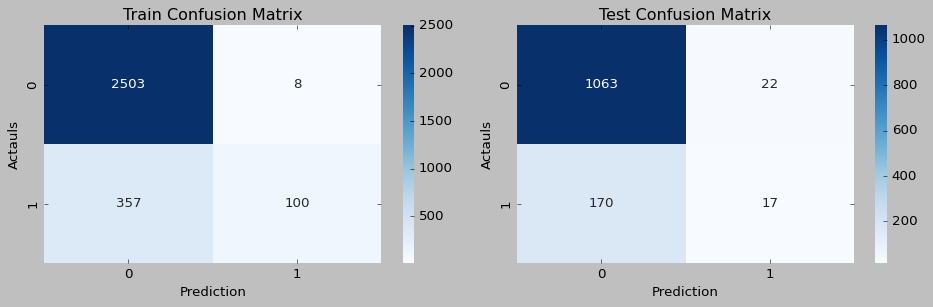

KNeighborsClassifier()
Model Train Score:  0.8679245283018868
Model Test Score:  0.8294025157232704
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2511
           1       0.74      0.22      0.34       457

    accuracy                           0.87      2968
   macro avg       0.81      0.60      0.63      2968
weighted avg       0.85      0.87      0.84      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1085
           1       0.17      0.04      0.07       187

    accuracy                           0.83      1272
   macro avg       0.51      0.50      0.49      1272
weighted avg       0.75      0.83      0.78      1272



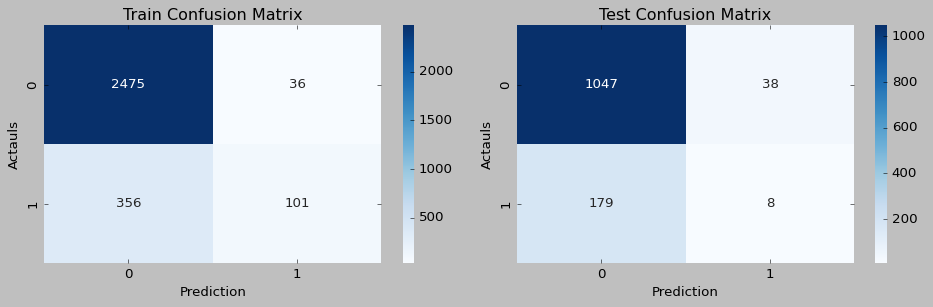

Model  Train_Accuracy  \
0                                       GaussianNB()            0.82   
1                           DecisionTreeClassifier()            1.00   
2  (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3  (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4  ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                             KNeighborsClassifier()            0.87   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.83          0.22         0.24             0.37            0.38  
1           0.75          1.00         0.22             1.00            0.19  
2           0.85          1.00         0.07             1.00            0.50  
3           0.85          0.14         0.07             0.72            0.48  
4           0.85          0.22         0.09             0.93            0.44  
5           0.83          0.22         0.04             0.74            0.17

In [189]:
operations(df_mean_Out)

GaussianNB()
Model Train Score:  0.6350059737156512
Model Test Score:  0.7130503144654088
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.61      0.73      0.67      2511
           1       0.67      0.54      0.60      2511

    accuracy                           0.64      5022
   macro avg       0.64      0.64      0.63      5022
weighted avg       0.64      0.64      0.63      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1085
           1       0.27      0.58      0.37       187

    accuracy                           0.71      1272
   macro avg       0.59      0.66      0.59      1272
weighted avg       0.82      0.71      0.75      1272



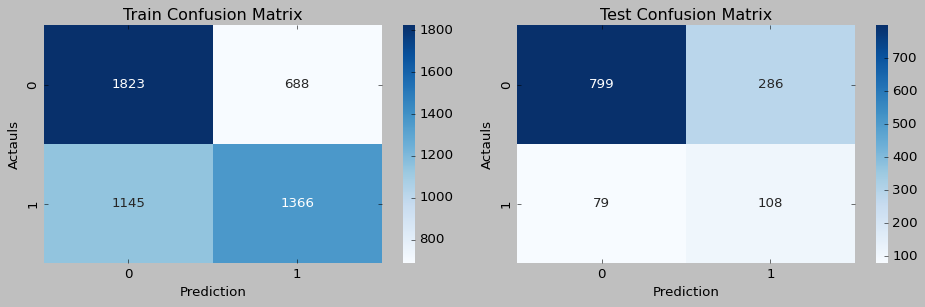

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7044025157232704
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1085
           1       0.17      0.26      0.20       187

    accuracy                           0.70      1272
   macro avg       0.51      0.52      0.51      1272
weighted avg       0.76      0.70      0.73      1272



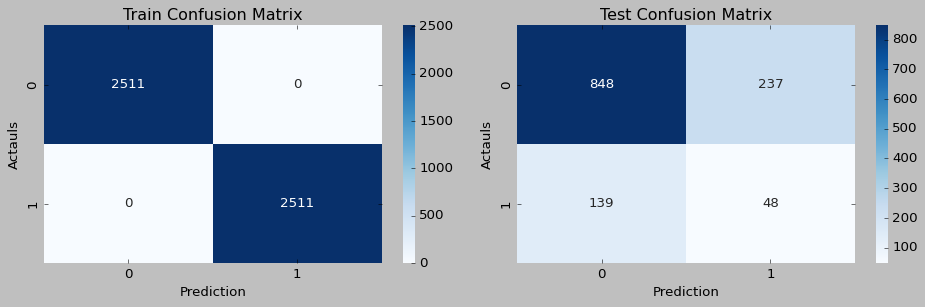

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.7822327044025157
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1085
           1       0.23      0.20      0.22       187

    accuracy                           0.78      1272
   macro avg       0.55      0.54      0.54      1272
weighted avg       0.77      0.78      0.78      1272



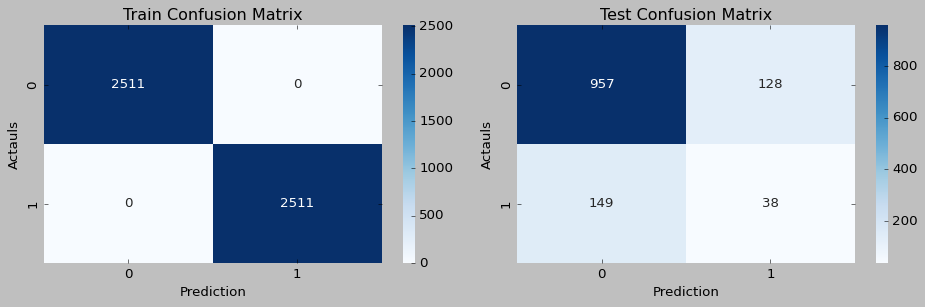

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.7747909199522103
Model Test Score:  0.7122641509433962
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2511
           1       0.77      0.78      0.78      2511

    accuracy                           0.77      5022
   macro avg       0.77      0.77      0.77      5022
weighted avg       0.77      0.77      0.77      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1085
           1       0.25      0.47      0.32       187

    accuracy                           0.71      1272
   macro avg       0.57      0.61      0.57      1272
weighted avg       0.80      0.71      0.74      1272



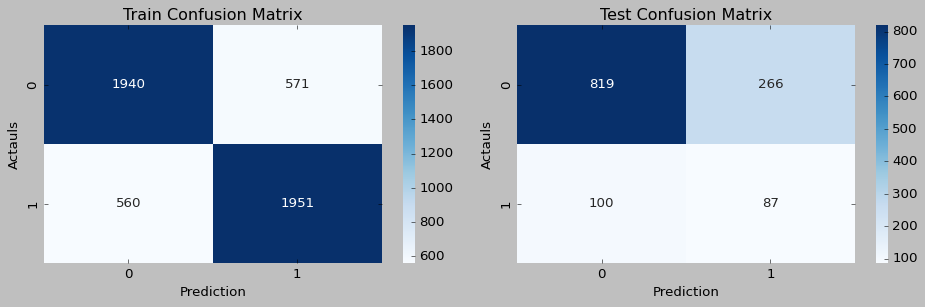

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8502588610115492
Model Test Score:  0.7382075471698113
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2511
           1       0.85      0.86      0.85      2511

    accuracy                           0.85      5022
   macro avg       0.85      0.85      0.85      5022
weighted avg       0.85      0.85      0.85      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1085
           1       0.24      0.36      0.29       187

    accuracy                           0.74      1272
   macro avg       0.56      0.58      0.56      1272
weighted avg       0.79      0.74      0.76      1272



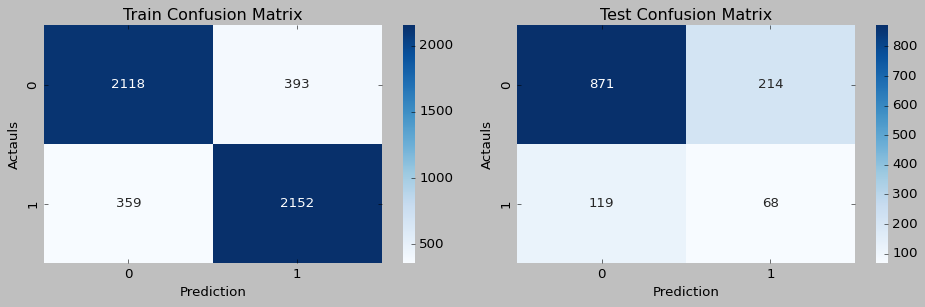

KNeighborsClassifier()
Model Train Score:  0.8761449621664675
Model Test Score:  0.6265723270440252
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      2511
           1       0.81      0.99      0.89      2511

    accuracy                           0.88      5022
   macro avg       0.90      0.88      0.87      5022
weighted avg       0.90      0.88      0.87      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1085
           1       0.19      0.48      0.27       187

    accuracy                           0.63      1272
   macro avg       0.54      0.57      0.51      1272
weighted avg       0.78      0.63      0.68      1272



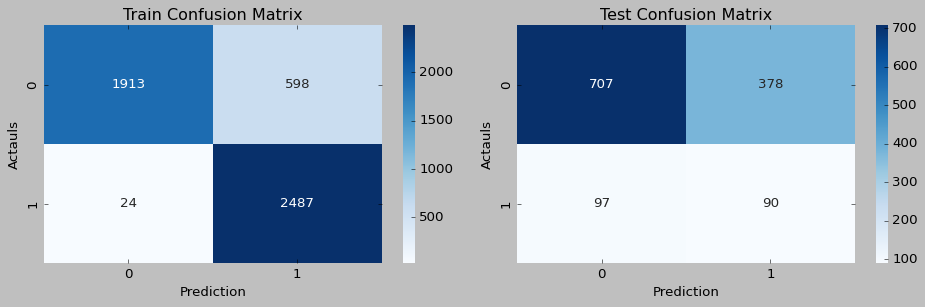

Model  Train_Accuracy  \
0                                        GaussianNB()            0.82   
1                            DecisionTreeClassifier()            1.00   
2   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3   (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4   ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                              KNeighborsClassifier()            0.87   
6                                        GaussianNB()            0.64   
7                            DecisionTreeClassifier()            1.00   
8   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
9   (DecisionTreeClassifier(max_depth=1, random_st...            0.77   
10  ([DecisionTreeRegressor(criterion='friedman_ms...            0.85   
11                             KNeighborsClassifier()            0.88   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0            0.83          0.22         0.24             0.37            0.38  
1            0.75          1.00         0.22             1.00            0.19  
2            0.85          1.00         0.07             1.00            0.50  
3            0.85          0.14         0.07             0.72            0.48  
4            0.85          0.22         0.09             0.93            0.44  
5            0.83          0.22         0.04             0.74            0.17  
6            0.71          0.54         0.58             0.67            0.27  
7            0.70          1.00         0.26             1.00            0.17  
8            0.78          1.00         0.20             1.00            0.23  
9            0.71          0.78         0.47             0.77            0.25  
10           0.74          0.86         0.36             0.85            0.24  
11           0.63          0.99         0.48             0.81            0.19

In [190]:
smote(df_mean_Out)

GaussianNB()
Model Train Score:  0.8261455525606469
Model Test Score:  0.8309748427672956
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2511
         1.0       0.37      0.18      0.24       457

    accuracy                           0.83      2968
   macro avg       0.62      0.56      0.57      2968
weighted avg       0.79      0.83      0.80      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      1085
         1.0       0.36      0.19      0.25       187

    accuracy                           0.83      1272
   macro avg       0.62      0.57      0.58      1272
weighted avg       0.80      0.83      0.81      1272



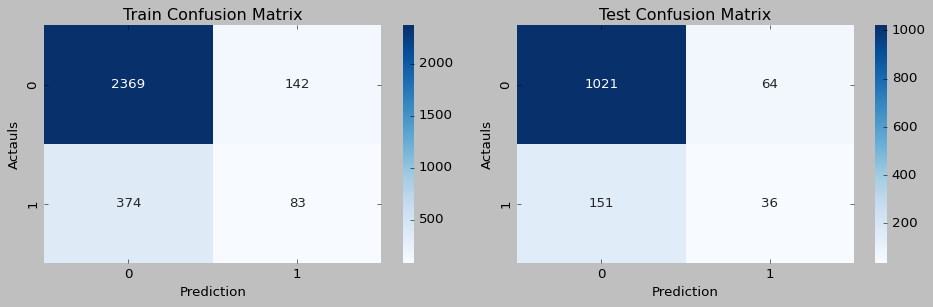

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7720125786163522
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1085
         1.0       0.24      0.25      0.24       187

    accuracy                           0.77      1272
   macro avg       0.55      0.55      0.55      1272
weighted avg       0.78      0.77      0.77      1272



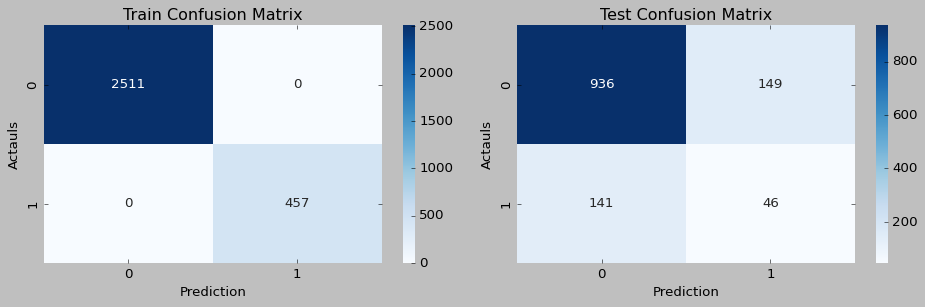

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.8514150943396226
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1085
         1.0       0.46      0.06      0.10       187

    accuracy                           0.85      1272
   macro avg       0.66      0.52      0.51      1272
weighted avg       0.80      0.85      0.80      1272



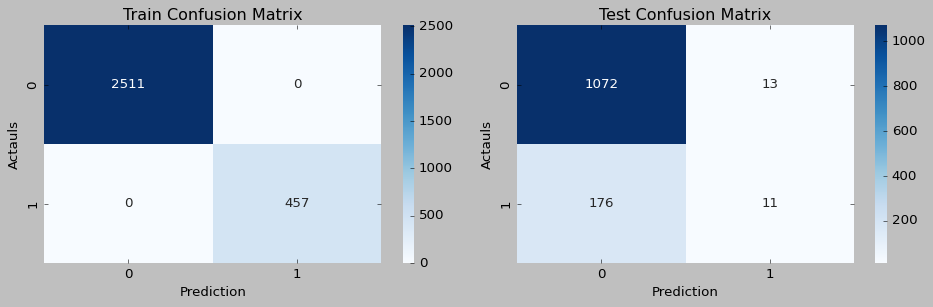

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.8584905660377359
Model Test Score:  0.8459119496855346
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      2511
         1.0       0.72      0.13      0.23       457

    accuracy                           0.86      2968
   macro avg       0.79      0.56      0.57      2968
weighted avg       0.84      0.86      0.81      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1085
         1.0       0.38      0.08      0.13       187

    accuracy                           0.85      1272
   macro avg       0.62      0.53      0.52      1272
weighted avg       0.79      0.85      0.80      1272



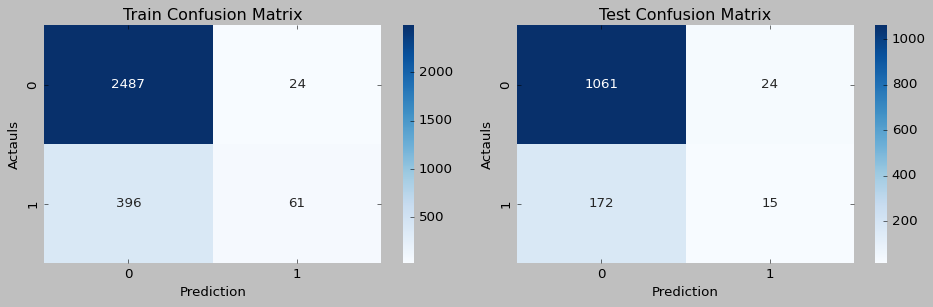

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8797169811320755
Model Test Score:  0.8498427672955975
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      2511
         1.0       0.95      0.23      0.37       457

    accuracy                           0.88      2968
   macro avg       0.92      0.61      0.65      2968
weighted avg       0.89      0.88      0.85      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1085
         1.0       0.44      0.09      0.14       187

    accuracy                           0.85      1272
   macro avg       0.65      0.53      0.53      1272
weighted avg       0.80      0.85      0.80      1272



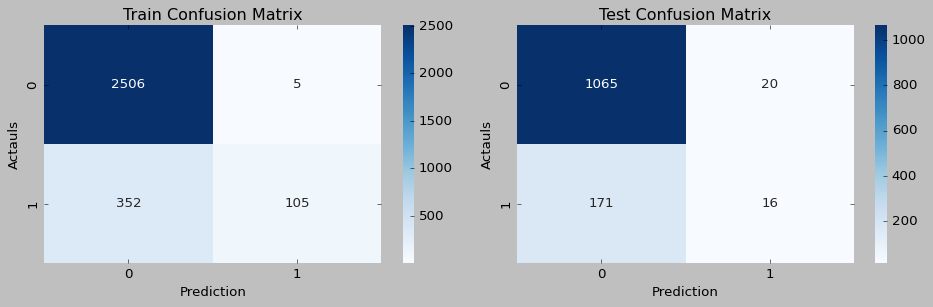

KNeighborsClassifier()
Model Train Score:  0.8702830188679245
Model Test Score:  0.8294025157232704
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2511
         1.0       0.76      0.23      0.36       457

    accuracy                           0.87      2968
   macro avg       0.82      0.61      0.64      2968
weighted avg       0.86      0.87      0.84      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91      1085
         1.0       0.17      0.04      0.07       187

    accuracy                           0.83      1272
   macro avg       0.51      0.50      0.49      1272
weighted avg       0.75      0.83      0.78      1272



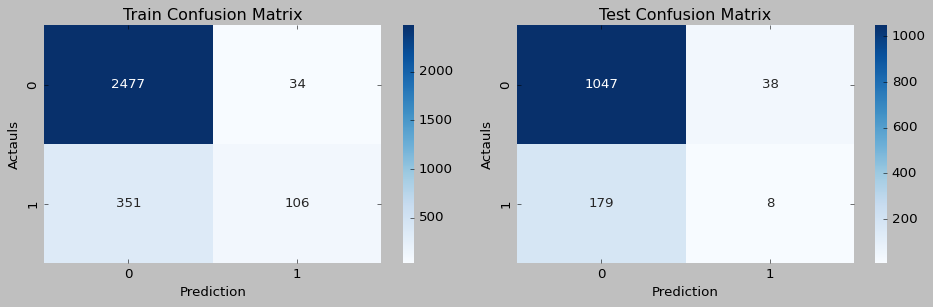

Model  Train_Accuracy  \
0                                       GaussianNB()            0.83   
1                           DecisionTreeClassifier()            1.00   
2  (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3  (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4  ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                             KNeighborsClassifier()            0.87   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.83          0.18         0.19             0.37            0.36  
1           0.77          1.00         0.25             1.00            0.24  
2           0.85          1.00         0.06             1.00            0.46  
3           0.85          0.13         0.08             0.72            0.38  
4           0.85          0.23         0.09             0.95            0.44  
5           0.83          0.23         0.04             0.76            0.17

In [205]:
operations(df_median)

GaussianNB()
Model Train Score:  0.5985663082437276
Model Test Score:  0.8113207547169812
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.56      0.89      0.69      2511
         1.0       0.74      0.30      0.43      2511

    accuracy                           0.60      5022
   macro avg       0.65      0.60      0.56      5022
weighted avg       0.65      0.60      0.56      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1085
         1.0       0.35      0.34      0.34       187

    accuracy                           0.81      1272
   macro avg       0.62      0.61      0.62      1272
weighted avg       0.81      0.81      0.81      1272



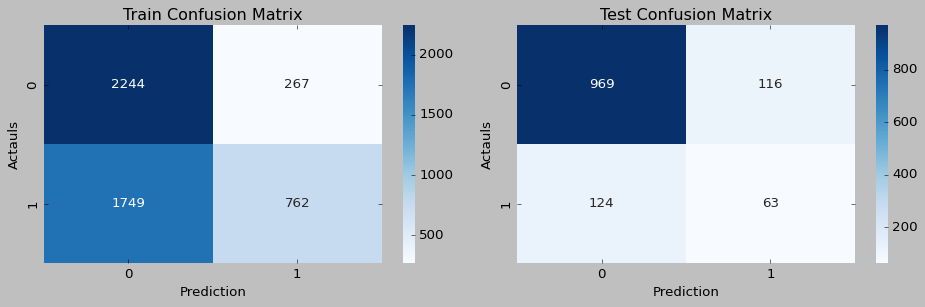

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7224842767295597
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      1085
         1.0       0.23      0.36      0.28       187

    accuracy                           0.72      1272
   macro avg       0.55      0.57      0.55      1272
weighted avg       0.78      0.72      0.75      1272



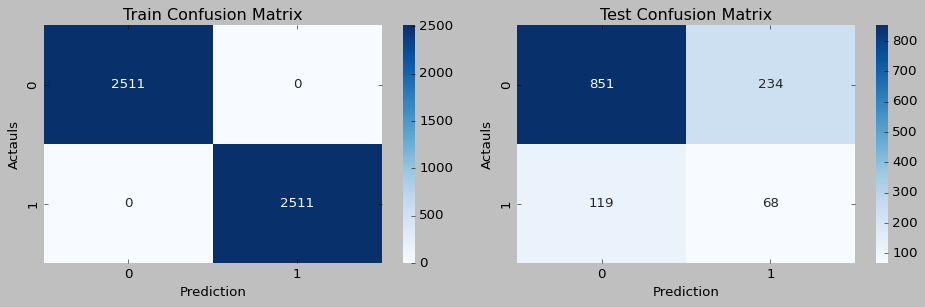

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.7861635220125787
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1085
         1.0       0.24      0.20      0.22       187

    accuracy                           0.79      1272
   macro avg       0.55      0.54      0.55      1272
weighted avg       0.77      0.79      0.78      1272



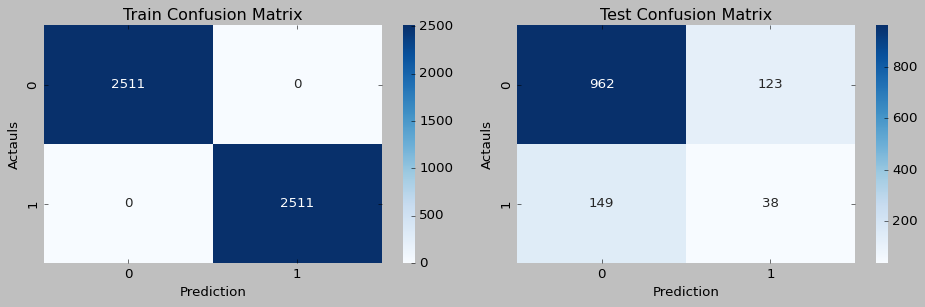

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.7739944245320589
Model Test Score:  0.7059748427672956
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77      2511
         1.0       0.77      0.78      0.77      2511

    accuracy                           0.77      5022
   macro avg       0.77      0.77      0.77      5022
weighted avg       0.77      0.77      0.77      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81      1085
         1.0       0.24      0.47      0.32       187

    accuracy                           0.71      1272
   macro avg       0.57      0.61      0.57      1272
weighted avg       0.80      0.71      0.74      1272



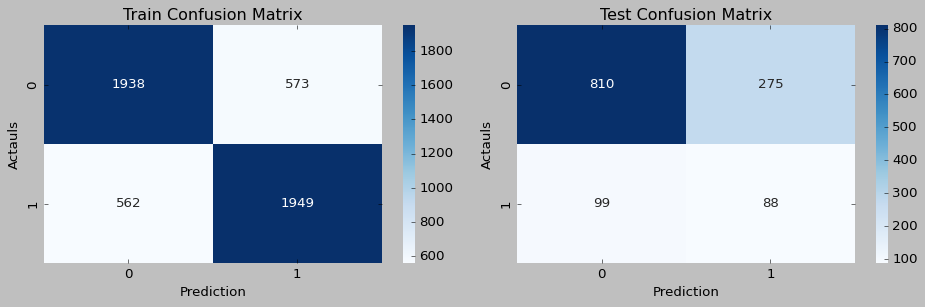

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8506571087216248
Model Test Score:  0.7303459119496856
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      2511
         1.0       0.85      0.85      0.85      2511

    accuracy                           0.85      5022
   macro avg       0.85      0.85      0.85      5022
weighted avg       0.85      0.85      0.85      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.84      1085
         1.0       0.22      0.32      0.26       187

    accuracy                           0.73      1272
   macro avg       0.54      0.56      0.55      1272
weighted avg       0.78      0.73      0.75      1272



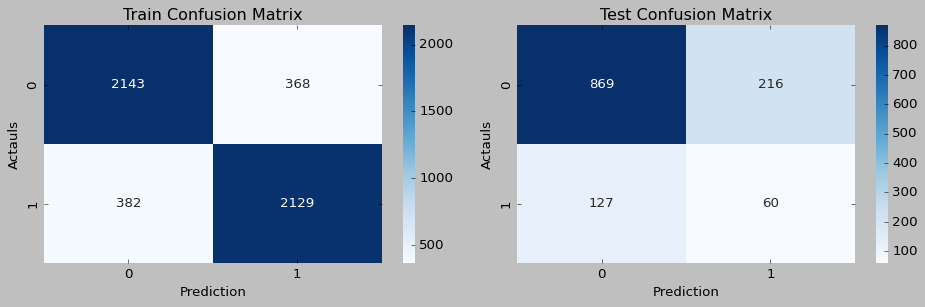

KNeighborsClassifier()
Model Train Score:  0.8745519713261649
Model Test Score:  0.6226415094339622
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86      2511
         1.0       0.81      0.98      0.89      2511

    accuracy                           0.87      5022
   macro avg       0.89      0.87      0.87      5022
weighted avg       0.89      0.87      0.87      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.88      0.65      0.75      1085
         1.0       0.19      0.48      0.27       187

    accuracy                           0.62      1272
   macro avg       0.53      0.56      0.51      1272
weighted avg       0.78      0.62      0.68      1272



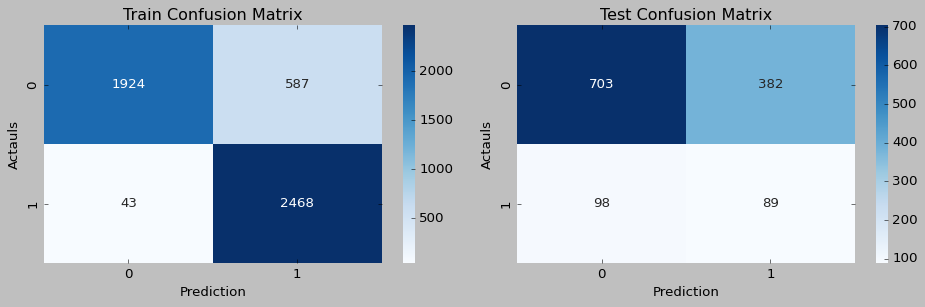

Model  Train_Accuracy  \
0                                        GaussianNB()            0.83   
1                            DecisionTreeClassifier()            1.00   
2   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3   (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4   ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                              KNeighborsClassifier()            0.87   
6                                        GaussianNB()            0.60   
7                            DecisionTreeClassifier()            1.00   
8   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
9   (DecisionTreeClassifier(max_depth=1, random_st...            0.77   
10  ([DecisionTreeRegressor(criterion='friedman_ms...            0.85   
11                             KNeighborsClassifier()            0.87   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0            0.83          0.18         0.19             0.37            0.36  
1            0.77          1.00         0.25             1.00            0.24  
2            0.85          1.00         0.06             1.00            0.46  
3            0.85          0.13         0.08             0.72            0.38  
4            0.85          0.23         0.09             0.95            0.44  
5            0.83          0.23         0.04             0.76            0.17  
6            0.81          0.30         0.34             0.74            0.35  
7            0.72          1.00         0.36             1.00            0.23  
8            0.79          1.00         0.20             1.00            0.24  
9            0.71          0.78         0.47             0.77            0.24  
10           0.73          0.85         0.32             0.85            0.22  
11           0.62          0.98         0.48             0.81            0.19

In [206]:
smote(df_median)

GaussianNB()
Model Train Score:  0.8210916442048517
Model Test Score:  0.8294025157232704
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2511
           1       0.36      0.22      0.27       457

    accuracy                           0.82      2968
   macro avg       0.62      0.57      0.59      2968
weighted avg       0.79      0.82      0.80      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1085
           1       0.38      0.24      0.29       187

    accuracy                           0.83      1272
   macro avg       0.63      0.59      0.60      1272
weighted avg       0.80      0.83      0.81      1272



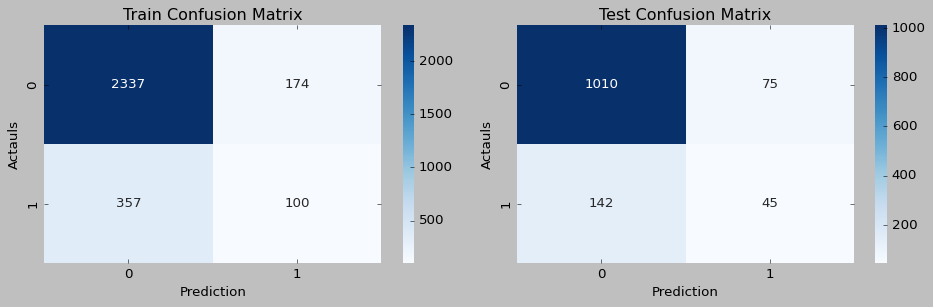

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7625786163522013
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1085
           1       0.21      0.23      0.22       187

    accuracy                           0.76      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.77      0.76      0.77      1272



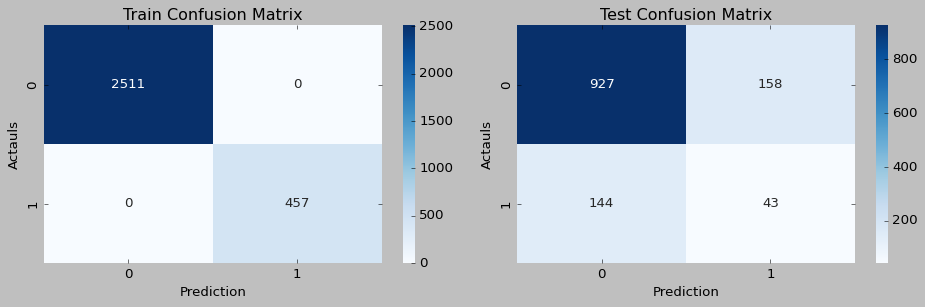

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.8537735849056604
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.52      0.06      0.11       187

    accuracy                           0.85      1272
   macro avg       0.69      0.53      0.52      1272
weighted avg       0.81      0.85      0.80      1272



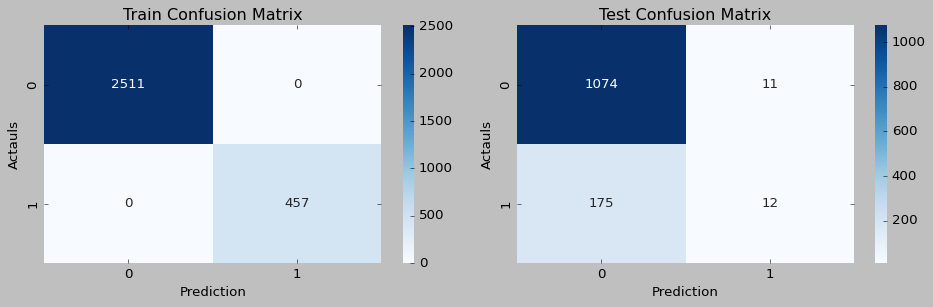

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.8574797843665768
Model Test Score:  0.8514150943396226
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2511
           1       0.71      0.12      0.21       457

    accuracy                           0.86      2968
   macro avg       0.79      0.56      0.57      2968
weighted avg       0.84      0.86      0.81      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.46      0.07      0.12       187

    accuracy                           0.85      1272
   macro avg       0.66      0.53      0.52      1272
weighted avg       0.80      0.85      0.80      1272



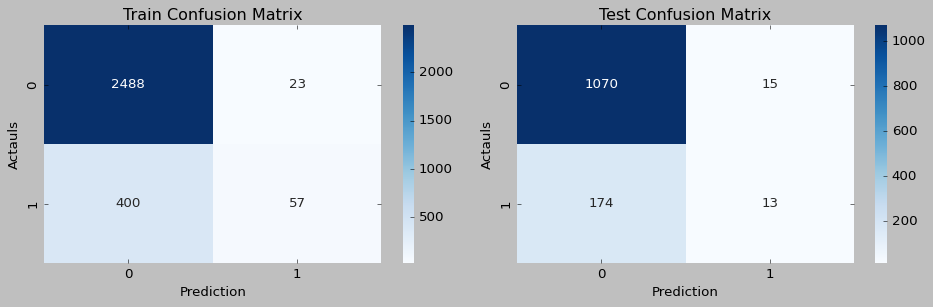

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8797169811320755
Model Test Score:  0.8498427672955975
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2511
           1       0.95      0.23      0.37       457

    accuracy                           0.88      2968
   macro avg       0.92      0.61      0.65      2968
weighted avg       0.89      0.88      0.85      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1085
           1       0.44      0.07      0.13       187

    accuracy                           0.85      1272
   macro avg       0.65      0.53      0.52      1272
weighted avg       0.80      0.85      0.80      1272



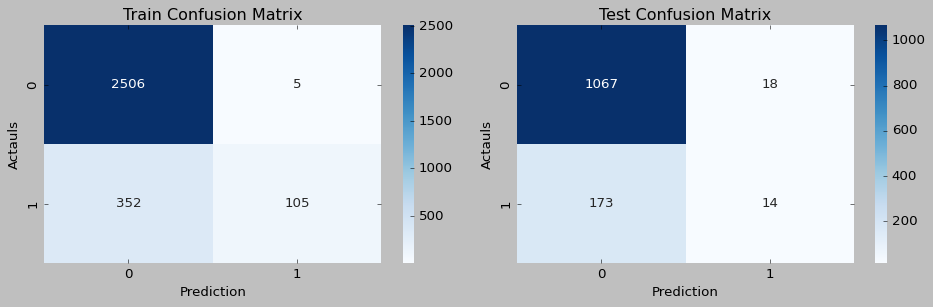

KNeighborsClassifier()
Model Train Score:  0.8679245283018868
Model Test Score:  0.8435534591194969
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.87      0.98      0.93      2511
           1       0.73      0.23      0.34       457

    accuracy                           0.87      2968
   macro avg       0.80      0.61      0.64      2968
weighted avg       0.85      0.87      0.84      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.39      0.12      0.18       187

    accuracy                           0.84      1272
   macro avg       0.63      0.54      0.55      1272
weighted avg       0.79      0.84      0.81      1272



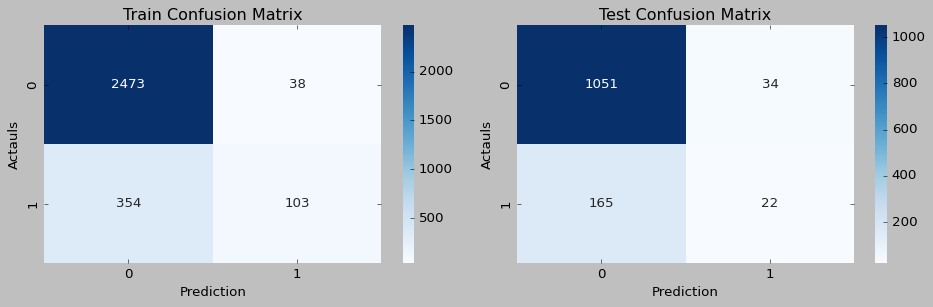

Model  Train_Accuracy  \
0                                       GaussianNB()            0.82   
1                           DecisionTreeClassifier()            1.00   
2  (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3  (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4  ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                             KNeighborsClassifier()            0.87   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.83          0.22         0.24             0.36            0.38  
1           0.76          1.00         0.23             1.00            0.21  
2           0.85          1.00         0.06             1.00            0.52  
3           0.85          0.12         0.07             0.71            0.46  
4           0.85          0.23         0.07             0.95            0.44  
5           0.84          0.23         0.12             0.73            0.39

In [208]:
operations(df_median_O)

GaussianNB()
Model Train Score:  0.6274392672242135
Model Test Score:  0.7327044025157232
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      2511
           1       0.67      0.50      0.57      2511

    accuracy                           0.63      5022
   macro avg       0.64      0.63      0.62      5022
weighted avg       0.64      0.63      0.62      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1085
           1       0.28      0.52      0.36       187

    accuracy                           0.73      1272
   macro avg       0.59      0.64      0.60      1272
weighted avg       0.81      0.73      0.76      1272



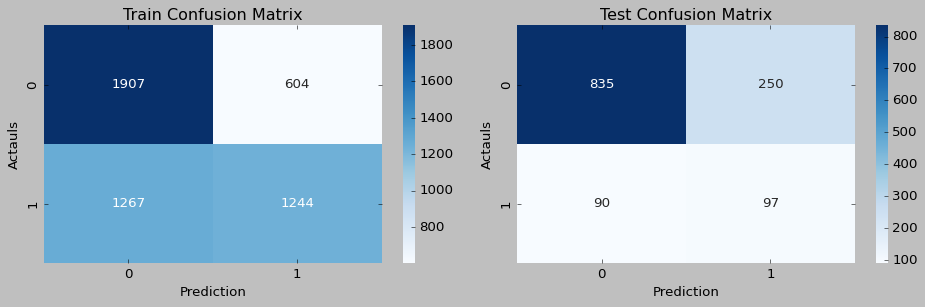

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7468553459119497
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1085
           1       0.22      0.29      0.25       187

    accuracy                           0.75      1272
   macro avg       0.55      0.56      0.55      1272
weighted avg       0.78      0.75      0.76      1272



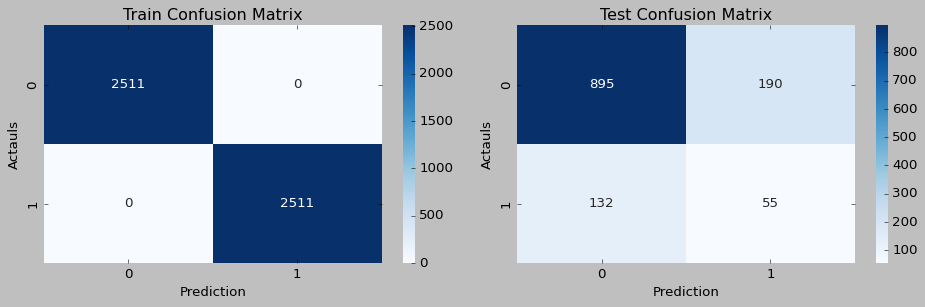

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.8309748427672956
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1085
           1       0.31      0.12      0.17       187

    accuracy                           0.83      1272
   macro avg       0.58      0.54      0.54      1272
weighted avg       0.78      0.83      0.80      1272



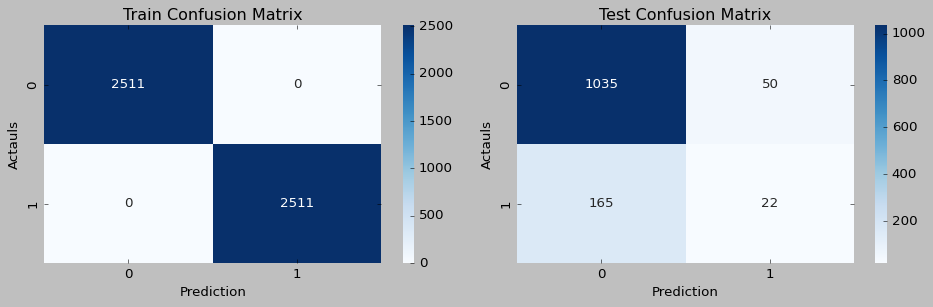

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.8606133014735166
Model Test Score:  0.8058176100628931
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2511
           1       0.91      0.80      0.85      2511

    accuracy                           0.86      5022
   macro avg       0.87      0.86      0.86      5022
weighted avg       0.87      0.86      0.86      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1085
           1       0.30      0.24      0.27       187

    accuracy                           0.81      1272
   macro avg       0.59      0.57      0.58      1272
weighted avg       0.79      0.81      0.80      1272



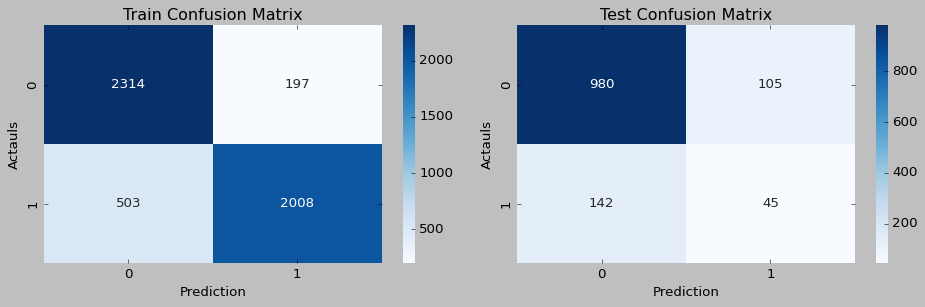

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8876941457586619
Model Test Score:  0.8231132075471698
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2511
           1       0.95      0.82      0.88      2511

    accuracy                           0.89      5022
   macro avg       0.90      0.89      0.89      5022
weighted avg       0.90      0.89      0.89      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1085
           1       0.31      0.16      0.21       187

    accuracy                           0.82      1272
   macro avg       0.59      0.55      0.56      1272
weighted avg       0.78      0.82      0.80      1272



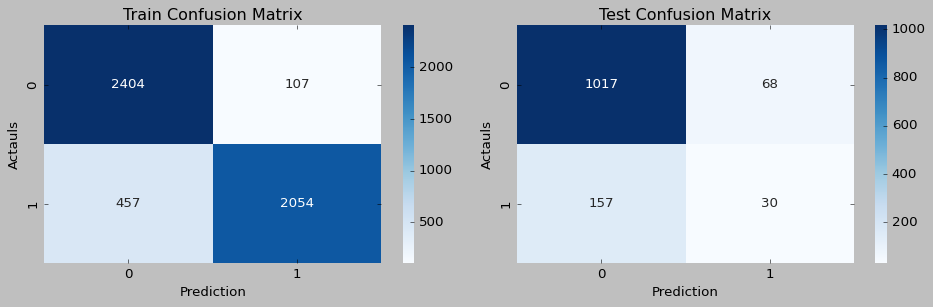

KNeighborsClassifier()
Model Train Score:  0.8705694942254082
Model Test Score:  0.6540880503144654
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      2511
           1       0.80      0.99      0.88      2511

    accuracy                           0.87      5022
   macro avg       0.89      0.87      0.87      5022
weighted avg       0.89      0.87      0.87      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1085
           1       0.21      0.50      0.30       187

    accuracy                           0.65      1272
   macro avg       0.55      0.59      0.53      1272
weighted avg       0.79      0.65      0.70      1272



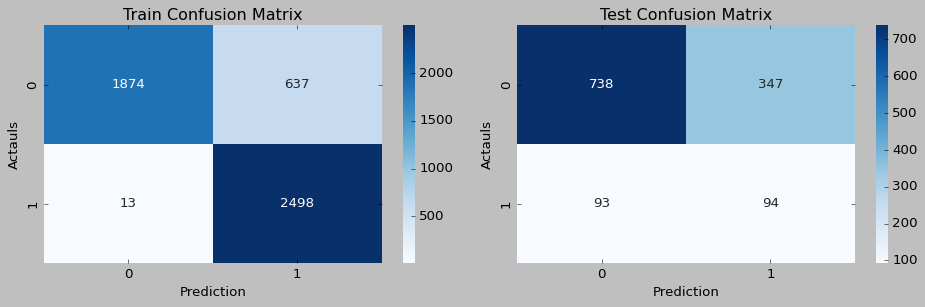

Model  Train_Accuracy  \
0                                        GaussianNB()            0.82   
1                            DecisionTreeClassifier()            1.00   
2   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3   (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4   ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                              KNeighborsClassifier()            0.87   
6                                        GaussianNB()            0.63   
7                            DecisionTreeClassifier()            1.00   
8   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
9   (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
10  ([DecisionTreeRegressor(criterion='friedman_ms...            0.89   
11                             KNeighborsClassifier()            0.87   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0            0.83          0.22         0.24             0.36            0.38  
1            0.76          1.00         0.23             1.00            0.21  
2            0.85          1.00         0.06             1.00            0.52  
3            0.85          0.12         0.07             0.71            0.46  
4            0.85          0.23         0.07             0.95            0.44  
5            0.84          0.23         0.12             0.73            0.39  
6            0.73          0.50         0.52             0.67            0.28  
7            0.75          1.00         0.29             1.00            0.22  
8            0.83          1.00         0.12             1.00            0.31  
9            0.81          0.80         0.24             0.91            0.30  
10           0.82          0.82         0.16             0.95            0.31  
11           0.65          0.99         0.50             0.80            0.21

In [209]:
smote(df_median_O)

GaussianNB()
Model Train Score:  0.8210916442048517
Model Test Score:  0.8294025157232704
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2511
           1       0.36      0.22      0.27       457

    accuracy                           0.82      2968
   macro avg       0.62      0.57      0.59      2968
weighted avg       0.79      0.82      0.80      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1085
           1       0.38      0.24      0.29       187

    accuracy                           0.83      1272
   macro avg       0.63      0.59      0.60      1272
weighted avg       0.80      0.83      0.81      1272



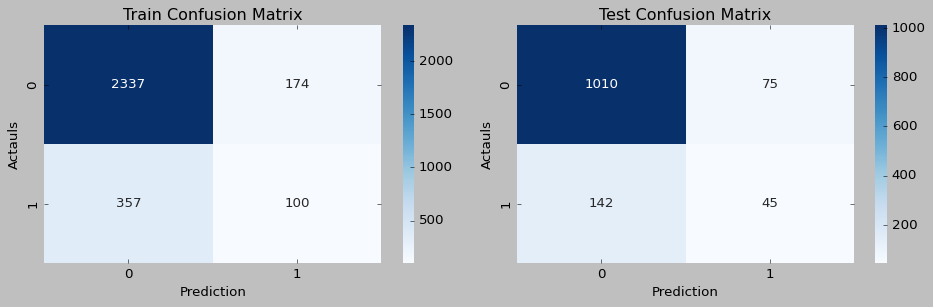

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7484276729559748
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1085
           1       0.20      0.23      0.21       187

    accuracy                           0.75      1272
   macro avg       0.53      0.53      0.53      1272
weighted avg       0.77      0.75      0.76      1272



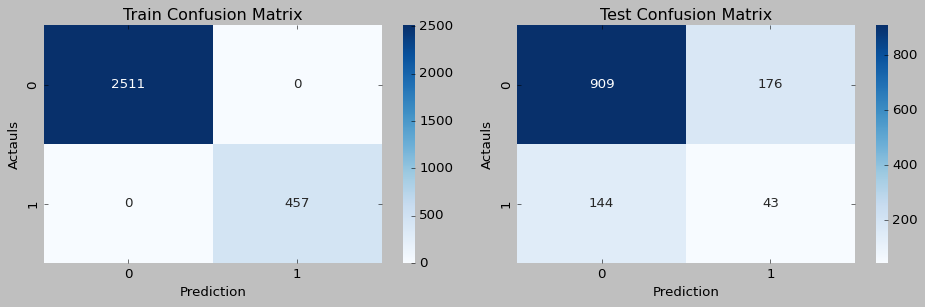

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.85062893081761
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.44      0.06      0.10       187

    accuracy                           0.85      1272
   macro avg       0.65      0.52      0.51      1272
weighted avg       0.80      0.85      0.80      1272



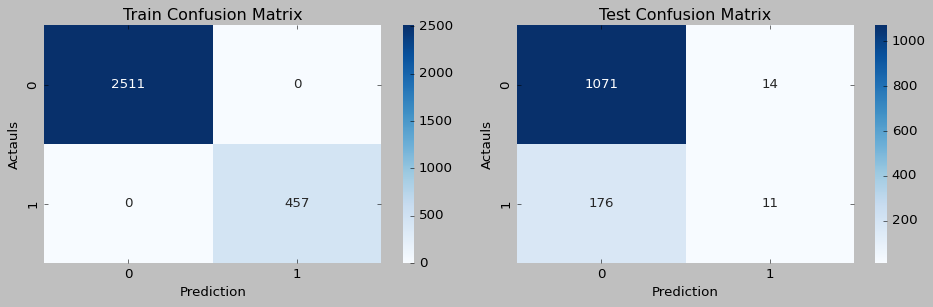

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.8574797843665768
Model Test Score:  0.8514150943396226
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2511
           1       0.71      0.12      0.21       457

    accuracy                           0.86      2968
   macro avg       0.79      0.56      0.57      2968
weighted avg       0.84      0.86      0.81      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.46      0.07      0.12       187

    accuracy                           0.85      1272
   macro avg       0.66      0.53      0.52      1272
weighted avg       0.80      0.85      0.80      1272



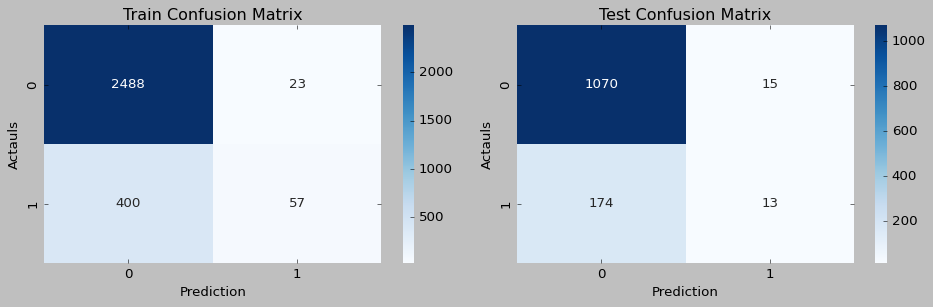

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8797169811320755
Model Test Score:  0.8498427672955975
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2511
           1       0.95      0.23      0.37       457

    accuracy                           0.88      2968
   macro avg       0.92      0.61      0.65      2968
weighted avg       0.89      0.88      0.85      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1085
           1       0.44      0.07      0.13       187

    accuracy                           0.85      1272
   macro avg       0.65      0.53      0.52      1272
weighted avg       0.80      0.85      0.80      1272



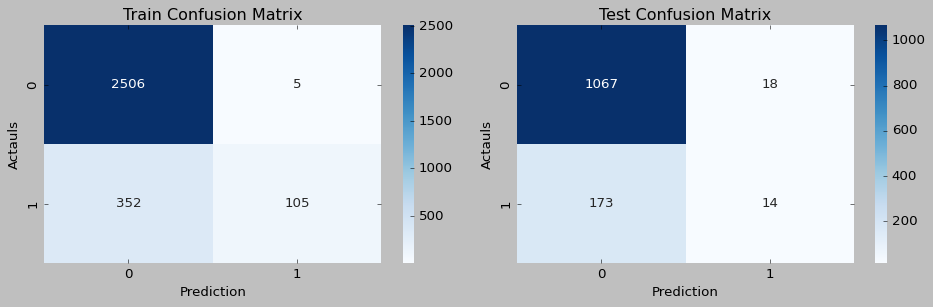

KNeighborsClassifier()
Model Train Score:  0.8679245283018868
Model Test Score:  0.8278301886792453
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2511
           1       0.74      0.22      0.34       457

    accuracy                           0.87      2968
   macro avg       0.81      0.60      0.63      2968
weighted avg       0.85      0.87      0.84      2968

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1085
           1       0.17      0.04      0.07       187

    accuracy                           0.83      1272
   macro avg       0.51      0.50      0.49      1272
weighted avg       0.75      0.83      0.78      1272



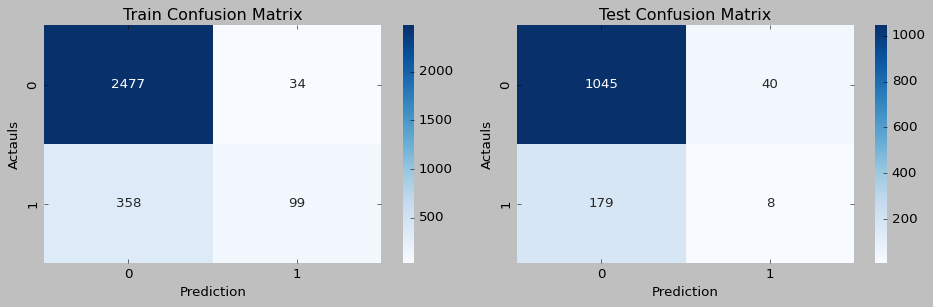

Model  Train_Accuracy  \
0                                       GaussianNB()            0.82   
1                           DecisionTreeClassifier()            1.00   
2  (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3  (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4  ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                             KNeighborsClassifier()            0.87   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.83          0.22         0.24             0.36            0.38  
1           0.75          1.00         0.23             1.00            0.20  
2           0.85          1.00         0.06             1.00            0.44  
3           0.85          0.12         0.07             0.71            0.46  
4           0.85          0.23         0.07             0.95            0.44  
5           0.83          0.22         0.04             0.74            0.17

In [211]:
operations(df_median_Out)

GaussianNB()
Model Train Score:  0.6340103544404619
Model Test Score:  0.7130503144654088
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.61      0.72      0.66      2511
           1       0.66      0.54      0.60      2511

    accuracy                           0.63      5022
   macro avg       0.64      0.63      0.63      5022
weighted avg       0.64      0.63      0.63      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1085
           1       0.27      0.58      0.37       187

    accuracy                           0.71      1272
   macro avg       0.59      0.66      0.59      1272
weighted avg       0.82      0.71      0.75      1272



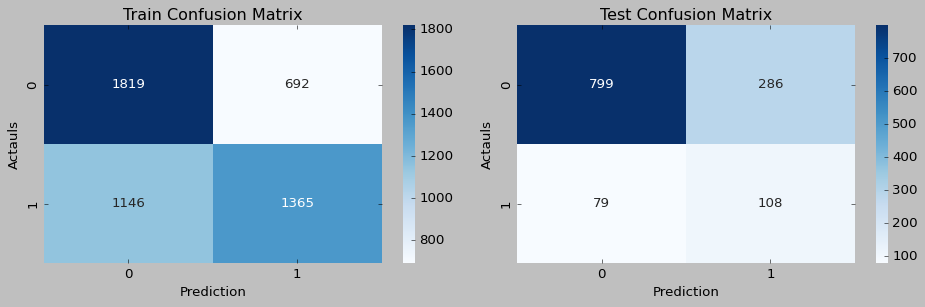

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7366352201257862
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1085
           1       0.22      0.32      0.26       187

    accuracy                           0.74      1272
   macro avg       0.55      0.56      0.55      1272
weighted avg       0.78      0.74      0.75      1272



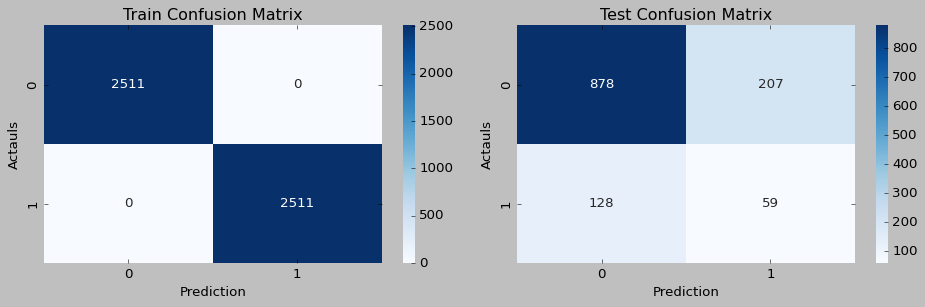

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.7932389937106918
Classification_report for Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1085
           1       0.25      0.20      0.22       187

    accuracy                           0.79      1272
   macro avg       0.56      0.55      0.55      1272
weighted avg       0.78      0.79      0.78      1272



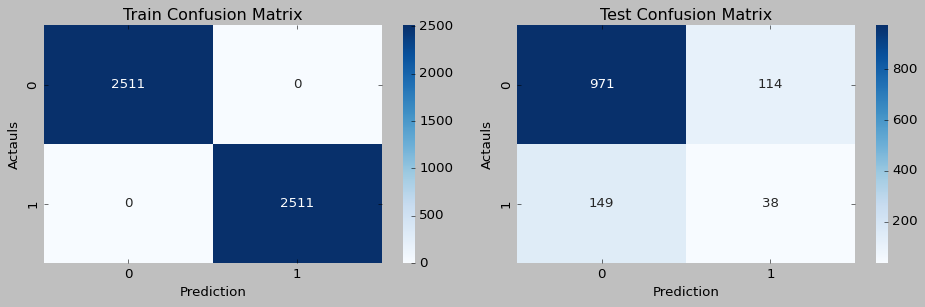

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.7743926722421346
Model Test Score:  0.7059748427672956
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2511
           1       0.77      0.78      0.78      2511

    accuracy                           0.77      5022
   macro avg       0.77      0.77      0.77      5022
weighted avg       0.77      0.77      0.77      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1085
           1       0.25      0.49      0.33       187

    accuracy                           0.71      1272
   macro avg       0.57      0.62      0.57      1272
weighted avg       0.80      0.71      0.74      1272



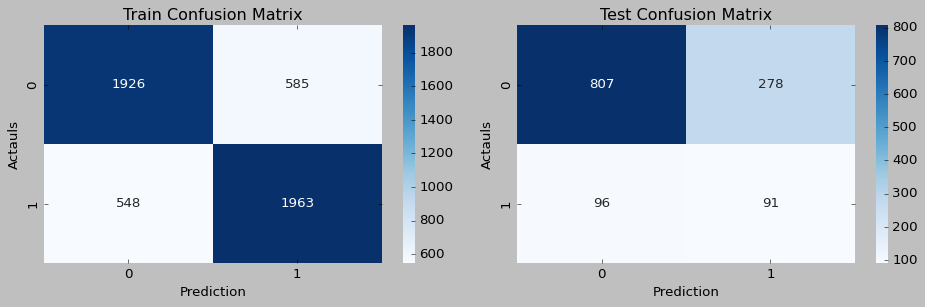

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8500597371565114
Model Test Score:  0.7327044025157232
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2511
           1       0.85      0.86      0.85      2511

    accuracy                           0.85      5022
   macro avg       0.85      0.85      0.85      5022
weighted avg       0.85      0.85      0.85      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1085
           1       0.24      0.36      0.29       187

    accuracy                           0.73      1272
   macro avg       0.56      0.58      0.56      1272
weighted avg       0.78      0.73      0.75      1272



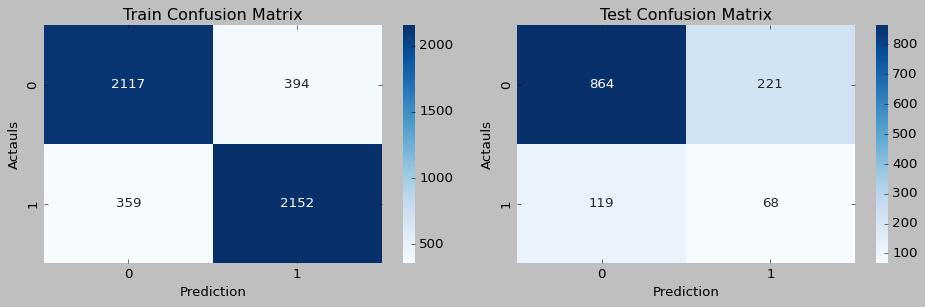

KNeighborsClassifier()
Model Train Score:  0.8759458383114297
Model Test Score:  0.6218553459119497
Classification_report for Train: 
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      2511
           1       0.81      0.99      0.89      2511

    accuracy                           0.88      5022
   macro avg       0.90      0.88      0.87      5022
weighted avg       0.90      0.88      0.87      5022

Classification_report for Test: 
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1085
           1       0.19      0.47      0.27       187

    accuracy                           0.62      1272
   macro avg       0.53      0.56      0.51      1272
weighted avg       0.77      0.62      0.67      1272



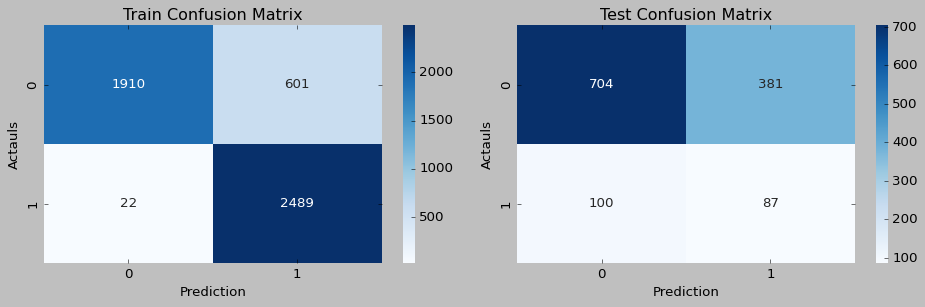

Model  Train_Accuracy  \
0                                        GaussianNB()            0.82   
1                            DecisionTreeClassifier()            1.00   
2   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3   (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4   ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                              KNeighborsClassifier()            0.87   
6                                        GaussianNB()            0.63   
7                            DecisionTreeClassifier()            1.00   
8   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
9   (DecisionTreeClassifier(max_depth=1, random_st...            0.77   
10  ([DecisionTreeRegressor(criterion='friedman_ms...            0.85   
11                             KNeighborsClassifier()            0.88   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0            0.83          0.22         0.24             0.36            0.38  
1            0.75          1.00         0.23             1.00            0.20  
2            0.85          1.00         0.06             1.00            0.44  
3            0.85          0.12         0.07             0.71            0.46  
4            0.85          0.23         0.07             0.95            0.44  
5            0.83          0.22         0.04             0.74            0.17  
6            0.71          0.54         0.58             0.66            0.27  
7            0.74          1.00         0.32             1.00            0.22  
8            0.79          1.00         0.20             1.00            0.25  
9            0.71          0.78         0.49             0.77            0.25  
10           0.73          0.86         0.36             0.85            0.24  
11           0.62          0.99         0.47             0.81            0.19

In [212]:
smote(df_median_Out)

GaussianNB()
Model Train Score:  0.828167115902965
Model Test Score:  0.8325471698113207
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      2511
         1.0       0.37      0.16      0.23       457

    accuracy                           0.83      2968
   macro avg       0.62      0.56      0.57      2968
weighted avg       0.79      0.83      0.80      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1085
         1.0       0.36      0.18      0.24       187

    accuracy                           0.83      1272
   macro avg       0.61      0.56      0.57      1272
weighted avg       0.79      0.83      0.81      1272



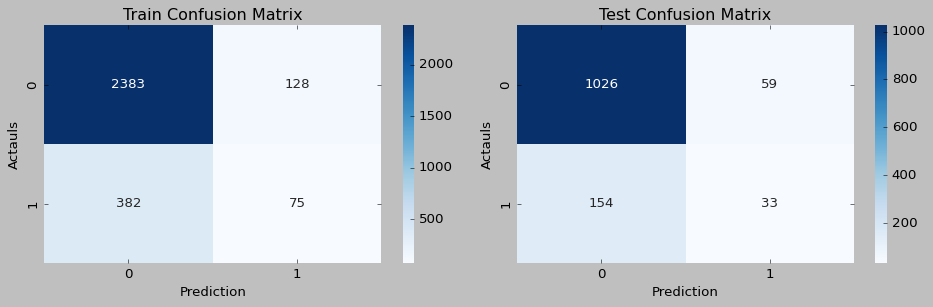

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7712264150943396
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1085
         1.0       0.24      0.25      0.24       187

    accuracy                           0.77      1272
   macro avg       0.55      0.56      0.55      1272
weighted avg       0.78      0.77      0.77      1272



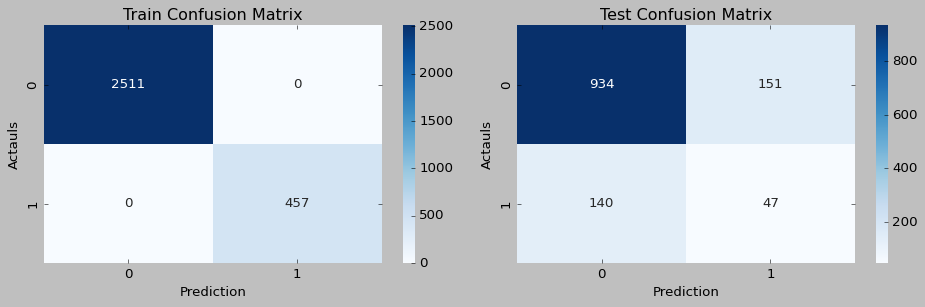

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.8529874213836478
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1085
         1.0       0.50      0.05      0.10       187

    accuracy                           0.85      1272
   macro avg       0.68      0.52      0.51      1272
weighted avg       0.81      0.85      0.80      1272



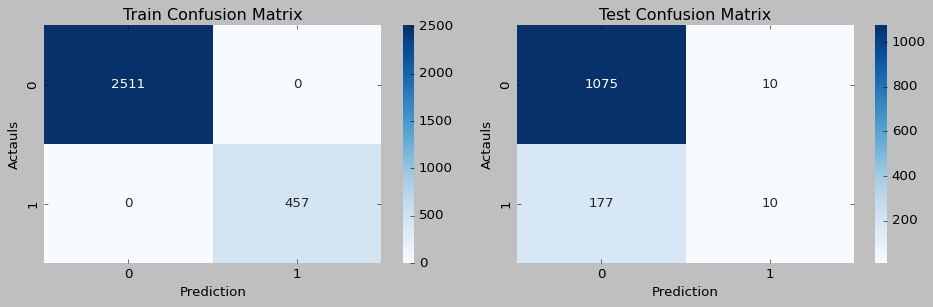

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.8578167115902965
Model Test Score:  0.8459119496855346
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      2511
         1.0       0.70      0.14      0.23       457

    accuracy                           0.86      2968
   macro avg       0.78      0.56      0.57      2968
weighted avg       0.84      0.86      0.81      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1085
         1.0       0.38      0.07      0.12       187

    accuracy                           0.85      1272
   macro avg       0.62      0.53      0.52      1272
weighted avg       0.79      0.85      0.80      1272



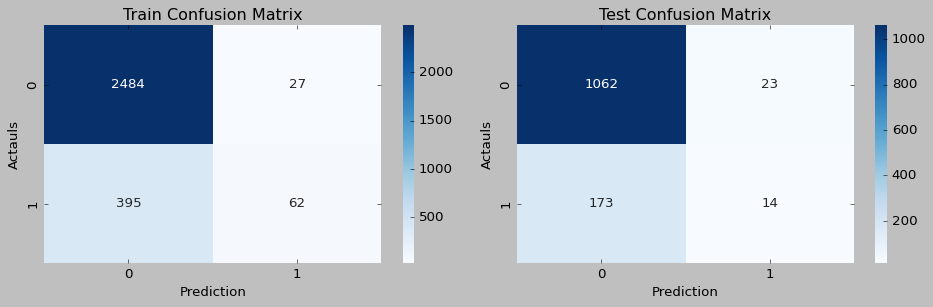

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8793800539083558
Model Test Score:  0.8474842767295597
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      2511
         1.0       0.96      0.23      0.37       457

    accuracy                           0.88      2968
   macro avg       0.92      0.61      0.65      2968
weighted avg       0.89      0.88      0.85      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1085
         1.0       0.41      0.09      0.14       187

    accuracy                           0.85      1272
   macro avg       0.64      0.53      0.53      1272
weighted avg       0.80      0.85      0.80      1272



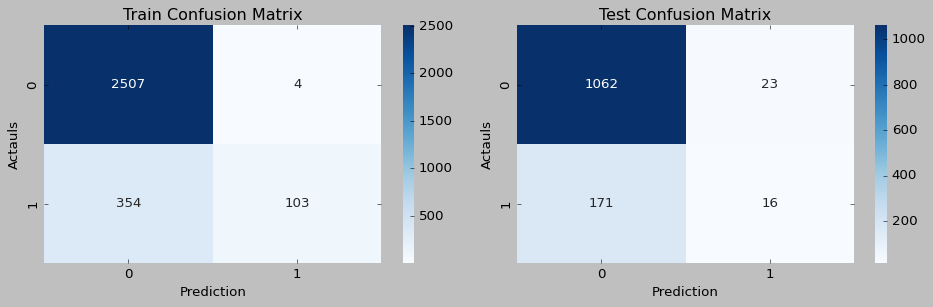

KNeighborsClassifier()
Model Train Score:  0.8672506738544474
Model Test Score:  0.8411949685534591
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2511
         1.0       0.71      0.23      0.35       457

    accuracy                           0.87      2968
   macro avg       0.79      0.61      0.64      2968
weighted avg       0.85      0.87      0.84      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1085
         1.0       0.35      0.10      0.15       187

    accuracy                           0.84      1272
   macro avg       0.61      0.53      0.53      1272
weighted avg       0.79      0.84      0.80      1272



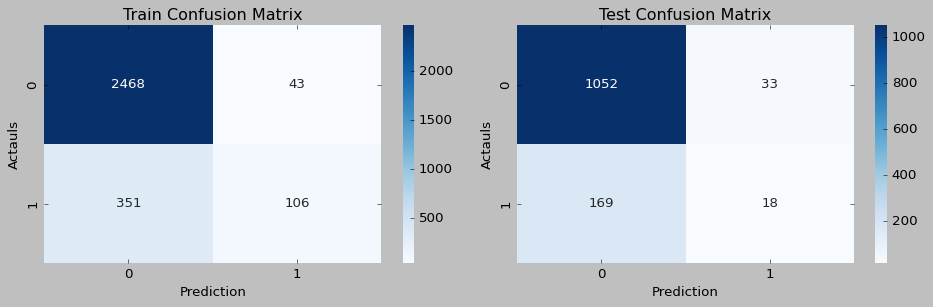

Model  Train_Accuracy  \
0                                       GaussianNB()            0.83   
1                           DecisionTreeClassifier()            1.00   
2  (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3  (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4  ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                             KNeighborsClassifier()            0.87   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.83          0.16         0.18             0.37            0.36  
1           0.77          1.00         0.25             1.00            0.24  
2           0.85          1.00         0.05             1.00            0.50  
3           0.85          0.14         0.07             0.70            0.38  
4           0.85          0.23         0.09             0.96            0.41  
5           0.84          0.23         0.10             0.71            0.35

In [216]:
operations(df_knn)

GaussianNB()
Model Train Score:  0.5890083632019116
Model Test Score:  0.8191823899371069
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.55      0.92      0.69      2511
         1.0       0.77      0.25      0.38      2511

    accuracy                           0.59      5022
   macro avg       0.66      0.59      0.54      5022
weighted avg       0.66      0.59      0.54      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      1085
         1.0       0.34      0.25      0.29       187

    accuracy                           0.82      1272
   macro avg       0.61      0.58      0.59      1272
weighted avg       0.80      0.82      0.81      1272



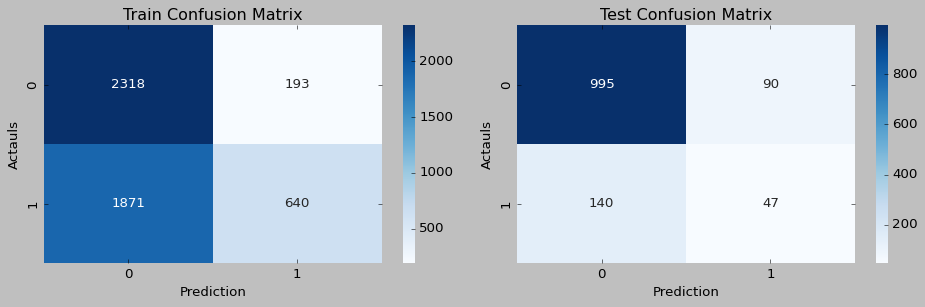

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7374213836477987
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1085
         1.0       0.19      0.24      0.21       187

    accuracy                           0.74      1272
   macro avg       0.53      0.53      0.53      1272
weighted avg       0.76      0.74      0.75      1272



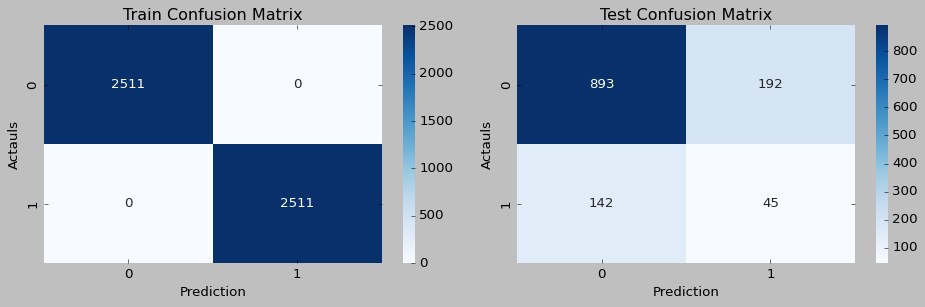

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.8317610062893082
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1085
         1.0       0.29      0.10      0.15       187

    accuracy                           0.83      1272
   macro avg       0.58      0.53      0.53      1272
weighted avg       0.78      0.83      0.80      1272



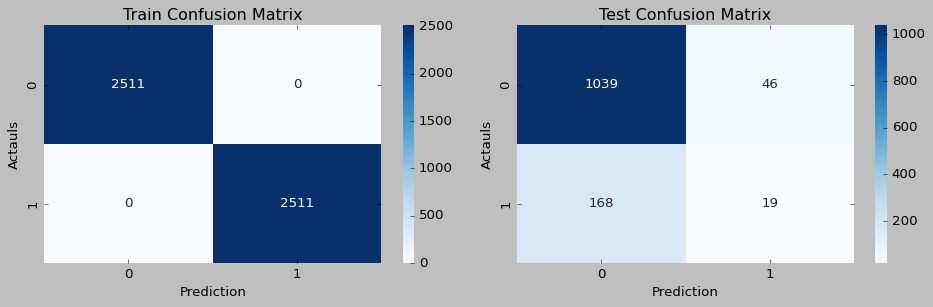

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.8546395858223815
Model Test Score:  0.8105345911949685
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.86      2511
         1.0       0.90      0.79      0.85      2511

    accuracy                           0.85      5022
   macro avg       0.86      0.85      0.85      5022
weighted avg       0.86      0.85      0.85      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1085
         1.0       0.30      0.22      0.25       187

    accuracy                           0.81      1272
   macro avg       0.59      0.57      0.57      1272
weighted avg       0.79      0.81      0.80      1272



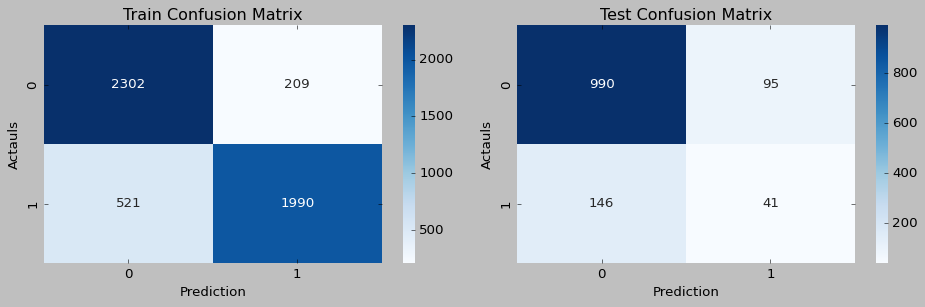

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8870967741935484
Model Test Score:  0.8207547169811321
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      2511
         1.0       0.95      0.82      0.88      2511

    accuracy                           0.89      5022
   macro avg       0.89      0.89      0.89      5022
weighted avg       0.89      0.89      0.89      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      1085
         1.0       0.30      0.17      0.22       187

    accuracy                           0.82      1272
   macro avg       0.59      0.55      0.56      1272
weighted avg       0.78      0.82      0.80      1272



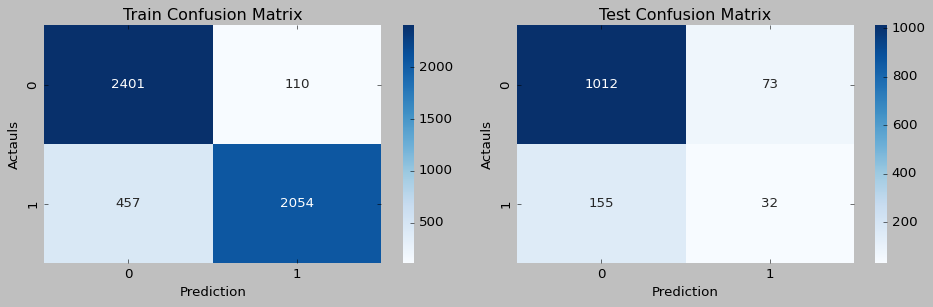

KNeighborsClassifier()
Model Train Score:  0.8743528474711271
Model Test Score:  0.6454402515723271
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86      2511
         1.0       0.80      0.99      0.89      2511

    accuracy                           0.87      5022
   macro avg       0.90      0.87      0.87      5022
weighted avg       0.90      0.87      0.87      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.88      0.68      0.76      1085
         1.0       0.20      0.47      0.28       187

    accuracy                           0.65      1272
   macro avg       0.54      0.57      0.52      1272
weighted avg       0.78      0.65      0.69      1272



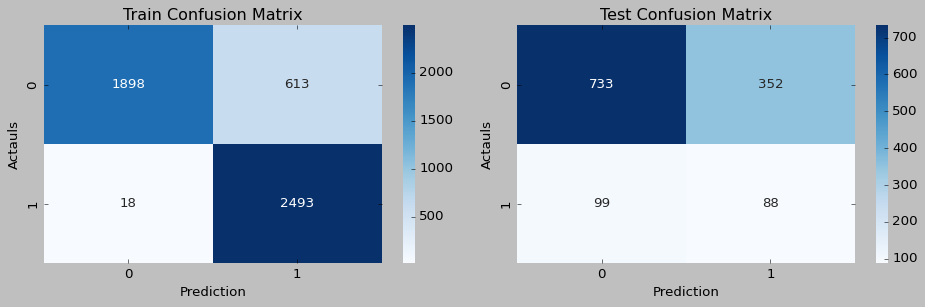

Model  Train_Accuracy  \
0                                        GaussianNB()            0.83   
1                            DecisionTreeClassifier()            1.00   
2   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3   (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4   ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                              KNeighborsClassifier()            0.87   
6                                        GaussianNB()            0.59   
7                            DecisionTreeClassifier()            1.00   
8   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
9   (DecisionTreeClassifier(max_depth=1, random_st...            0.85   
10  ([DecisionTreeRegressor(criterion='friedman_ms...            0.89   
11                             KNeighborsClassifier()            0.87   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0            0.83          0.16         0.18             0.37            0.36  
1            0.77          1.00         0.25             1.00            0.24  
2            0.85          1.00         0.05             1.00            0.50  
3            0.85          0.14         0.07             0.70            0.38  
4            0.85          0.23         0.09             0.96            0.41  
5            0.84          0.23         0.10             0.71            0.35  
6            0.82          0.25         0.25             0.77            0.34  
7            0.74          1.00         0.24             1.00            0.19  
8            0.83          1.00         0.10             1.00            0.29  
9            0.81          0.79         0.22             0.90            0.30  
10           0.82          0.82         0.17             0.95            0.30  
11           0.65          0.99         0.47             0.80            0.20

In [217]:
smote(df_knn)

GaussianNB()
Model Train Score:  0.828167115902965
Model Test Score:  0.8325471698113207
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      2511
         1.0       0.37      0.16      0.23       457

    accuracy                           0.83      2968
   macro avg       0.62      0.56      0.57      2968
weighted avg       0.79      0.83      0.80      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1085
         1.0       0.36      0.18      0.24       187

    accuracy                           0.83      1272
   macro avg       0.61      0.56      0.57      1272
weighted avg       0.79      0.83      0.81      1272



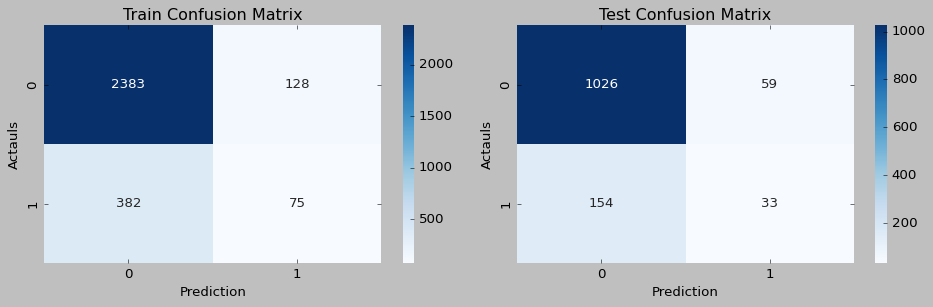

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7727987421383647
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1085
         1.0       0.24      0.26      0.25       187

    accuracy                           0.77      1272
   macro avg       0.56      0.56      0.56      1272
weighted avg       0.78      0.77      0.78      1272



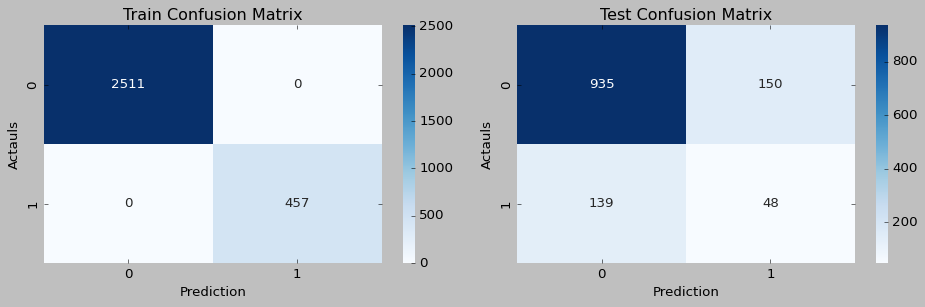

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.85062893081761
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1085
         1.0       0.43      0.05      0.09       187

    accuracy                           0.85      1272
   macro avg       0.64      0.52      0.50      1272
weighted avg       0.79      0.85      0.80      1272



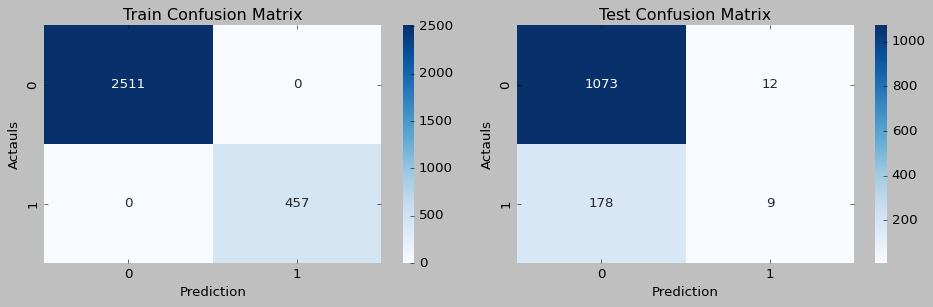

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.8578167115902965
Model Test Score:  0.8459119496855346
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      2511
         1.0       0.70      0.14      0.23       457

    accuracy                           0.86      2968
   macro avg       0.78      0.56      0.57      2968
weighted avg       0.84      0.86      0.81      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1085
         1.0       0.38      0.07      0.12       187

    accuracy                           0.85      1272
   macro avg       0.62      0.53      0.52      1272
weighted avg       0.79      0.85      0.80      1272



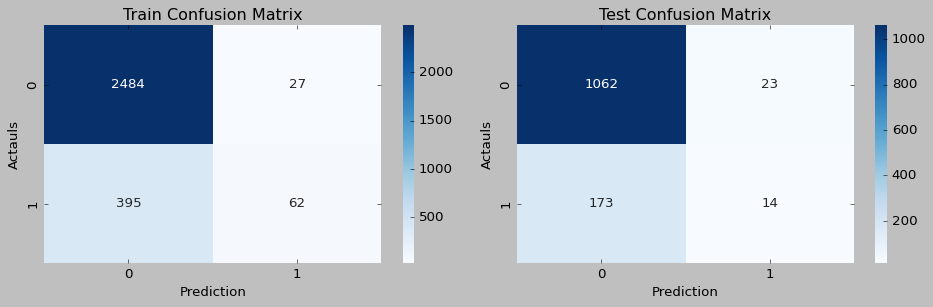

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.8793800539083558
Model Test Score:  0.8490566037735849
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      2511
         1.0       0.96      0.23      0.37       457

    accuracy                           0.88      2968
   macro avg       0.92      0.61      0.65      2968
weighted avg       0.89      0.88      0.85      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1085
         1.0       0.44      0.10      0.16       187

    accuracy                           0.85      1272
   macro avg       0.65      0.54      0.54      1272
weighted avg       0.80      0.85      0.81      1272



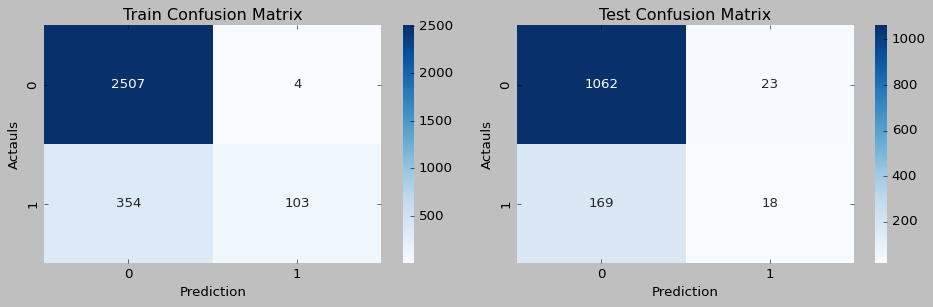

KNeighborsClassifier()
Model Train Score:  0.8675876010781671
Model Test Score:  0.8317610062893082
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      2511
         1.0       0.75      0.21      0.33       457

    accuracy                           0.87      2968
   macro avg       0.81      0.60      0.63      2968
weighted avg       0.85      0.87      0.83      2968

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      1085
         1.0       0.17      0.04      0.06       187

    accuracy                           0.83      1272
   macro avg       0.51      0.50      0.48      1272
weighted avg       0.75      0.83      0.78      1272



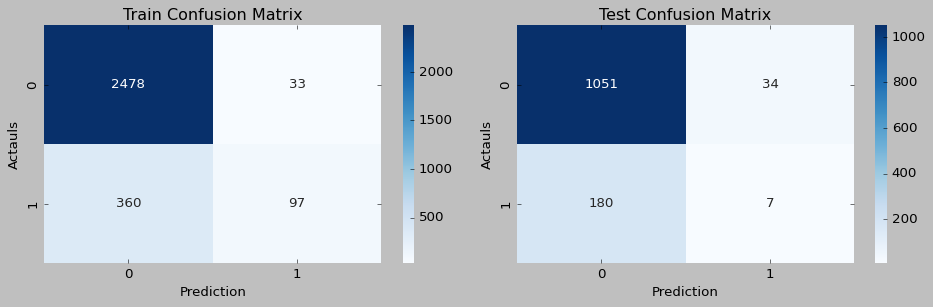

Model  Train_Accuracy  \
0                                       GaussianNB()            0.83   
1                           DecisionTreeClassifier()            1.00   
2  (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3  (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4  ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                             KNeighborsClassifier()            0.87   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.83          0.16         0.18             0.37            0.36  
1           0.77          1.00         0.26             1.00            0.24  
2           0.85          1.00         0.05             1.00            0.43  
3           0.85          0.14         0.07             0.70            0.38  
4           0.85          0.23         0.10             0.96            0.44  
5           0.83          0.21         0.04             0.75            0.17

In [219]:
operations(df_knn1)

GaussianNB()
Model Train Score:  0.5766626841895659
Model Test Score:  0.8191823899371069
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.55      0.92      0.68      2511
         1.0       0.74      0.24      0.36      2511

    accuracy                           0.58      5022
   macro avg       0.64      0.58      0.52      5022
weighted avg       0.64      0.58      0.52      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      1085
         1.0       0.36      0.29      0.32       187

    accuracy                           0.82      1272
   macro avg       0.62      0.60      0.61      1272
weighted avg       0.81      0.82      0.81      1272



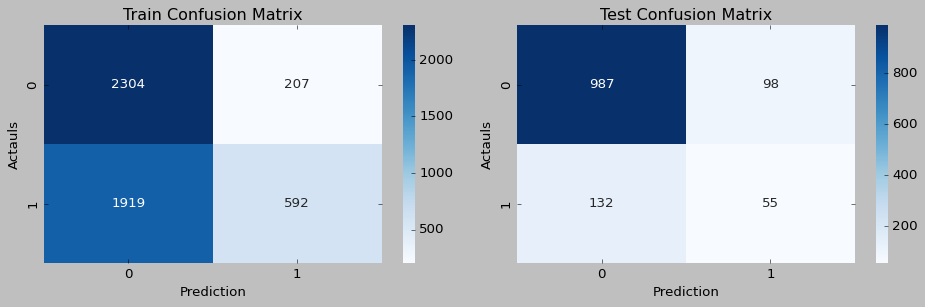

DecisionTreeClassifier()
Model Train Score:  1.0
Model Test Score:  0.7193396226415094
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83      1085
         1.0       0.20      0.32      0.25       187

    accuracy                           0.72      1272
   macro avg       0.54      0.55      0.54      1272
weighted avg       0.77      0.72      0.74      1272



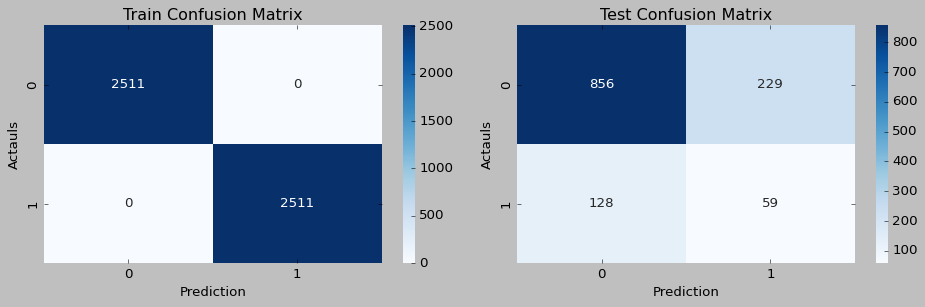

RandomForestClassifier(random_state=1)
Model Train Score:  1.0
Model Test Score:  0.7885220125786163
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      1085
         1.0       0.26      0.24      0.25       187

    accuracy                           0.79      1272
   macro avg       0.56      0.56      0.56      1272
weighted avg       0.78      0.79      0.78      1272



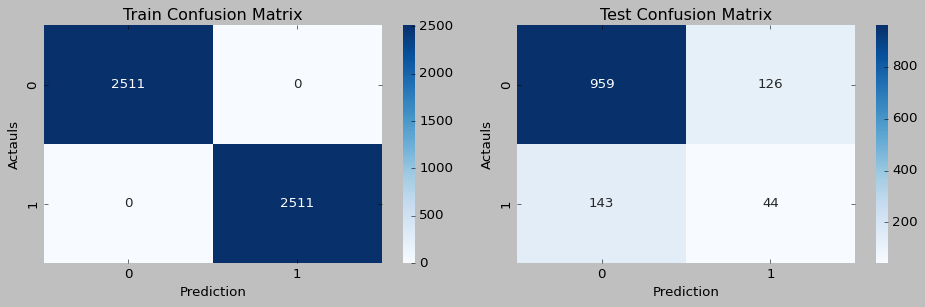

AdaBoostClassifier(n_estimators=100, random_state=1)
Model Train Score:  0.7686180804460374
Model Test Score:  0.6973270440251572
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77      2511
         1.0       0.77      0.78      0.77      2511

    accuracy                           0.77      5022
   macro avg       0.77      0.77      0.77      5022
weighted avg       0.77      0.77      0.77      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81      1085
         1.0       0.23      0.46      0.31       187

    accuracy                           0.70      1272
   macro avg       0.56      0.60      0.56      1272
weighted avg       0.79      0.70      0.73      1272



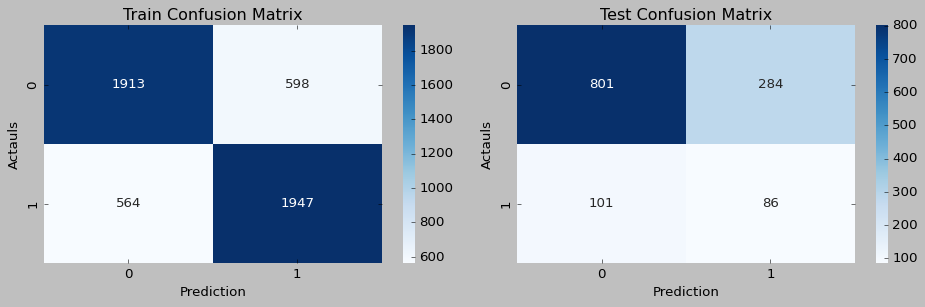

GradientBoostingClassifier(random_state=1)
Model Train Score:  0.844484269215452
Model Test Score:  0.7319182389937107
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      2511
         1.0       0.83      0.86      0.85      2511

    accuracy                           0.84      5022
   macro avg       0.84      0.84      0.84      5022
weighted avg       0.84      0.84      0.84      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      1085
         1.0       0.23      0.36      0.28       187

    accuracy                           0.73      1272
   macro avg       0.56      0.58      0.56      1272
weighted avg       0.78      0.73      0.75      1272



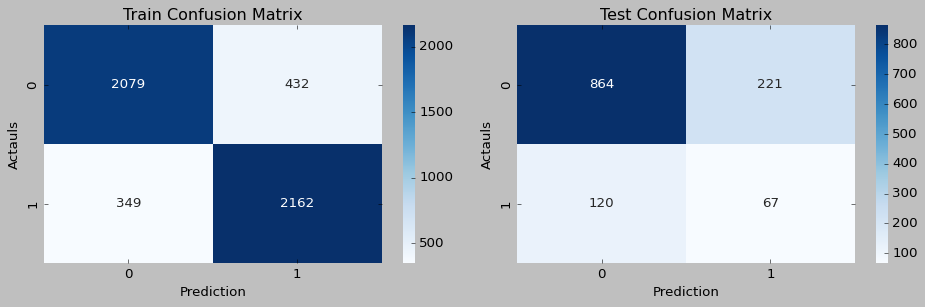

KNeighborsClassifier()
Model Train Score:  0.8769414575866189
Model Test Score:  0.6383647798742138
Classification_report for Train: 
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86      2511
         1.0       0.81      0.98      0.89      2511

    accuracy                           0.88      5022
   macro avg       0.89      0.88      0.88      5022
weighted avg       0.89      0.88      0.88      5022

Classification_report for Test: 
              precision    recall  f1-score   support

         0.0       0.89      0.66      0.76      1085
         1.0       0.21      0.52      0.30       187

    accuracy                           0.64      1272
   macro avg       0.55      0.59      0.53      1272
weighted avg       0.79      0.64      0.69      1272



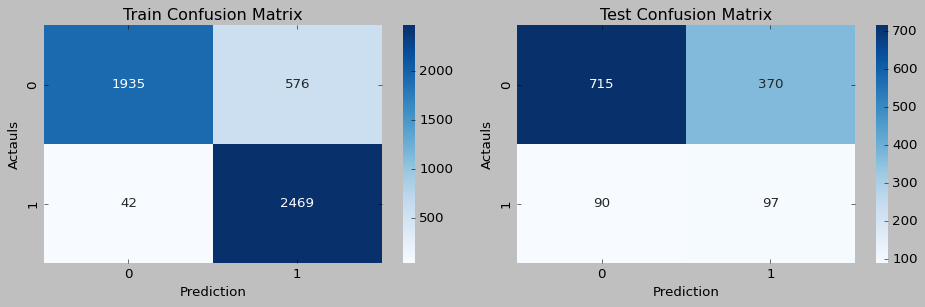

Model  Train_Accuracy  \
0                                        GaussianNB()            0.83   
1                            DecisionTreeClassifier()            1.00   
2   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
3   (DecisionTreeClassifier(max_depth=1, random_st...            0.86   
4   ([DecisionTreeRegressor(criterion='friedman_ms...            0.88   
5                              KNeighborsClassifier()            0.87   
6                                        GaussianNB()            0.58   
7                            DecisionTreeClassifier()            1.00   
8   (DecisionTreeClassifier(max_features='sqrt', r...            1.00   
9   (DecisionTreeClassifier(max_depth=1, random_st...            0.77   
10  ([DecisionTreeRegressor(criterion='friedman_ms...            0.84   
11                             KNeighborsClassifier()            0.88   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0            0.83          0.16         0.18             0.37            0.36  
1            0.77          1.00         0.26             1.00            0.24  
2            0.85          1.00         0.05             1.00            0.43  
3            0.85          0.14         0.07             0.70            0.38  
4            0.85          0.23         0.10             0.96            0.44  
5            0.83          0.21         0.04             0.75            0.17  
6            0.82          0.24         0.29             0.74            0.36  
7            0.72          1.00         0.32             1.00            0.20  
8            0.79          1.00         0.24             1.00            0.26  
9            0.70          0.78         0.46             0.77            0.23  
10           0.73          0.86         0.36             0.83            0.23  
11           0.64          0.98         0.52             0.81            0.21

In [220]:
smote(df_knn1)

In [ ]:
df_knn